# WEATHER DATA ANALYSIS

**1.DATA DOWNLOAD**

**2.DATA PREPARATION AND EXPLORATION**
- Load the file using Pandas
- Look at the information present in the dataset
- Fix any missing or incorrect values

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import calendar
import datetime
from matplotlib import style
style.use('dark_background')

In [2]:
df=pd.read_csv(r"C:\Users\nirmi\OneDrive\Desktop\ALL\EXCEL FILES\weatherHistory.csv",parse_dates=True)

In [3]:
df

,Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006/04/01 00:00:00.000 +0200,Partly Cloudy,rain,9.47,7.39,0.89,14.12,251,15.83,1015.13,Partly cloudy throughout the day.
1,2006/04/01 01:00:00.000 +0200,Partly Cloudy,rain,9.36,7.23,0.86,14.26,259,15.83,1015.63,Partly cloudy throughout the day.
2,2006/04/01 02:00:00.000 +0200,Mostly Cloudy,rain,9.38,9.38,0.89,3.93,204,14.96,1015.94,Partly cloudy throughout the day.
3,2006/04/01 03:00:00.000 +0200,Partly Cloudy,rain,8.29,5.94,0.83,14.10,269,15.83,1016.41,Partly cloudy throughout the day.
4,2006/04/01 04:00:00.000 +0200,Mostly Cloudy,rain,8.76,6.98,0.83,11.04,259,15.83,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...
96448,2016/09/09 19:00:00.000 +0200,Partly Cloudy,rain,26.02,26.02,0.43,11.00,31,16.10,1014.36,Partly cloudy starting in the morning.
96449,2016/09/09 20:00:00.000 +0200,Partly Cloudy,rain,24.58,24.58,0.48,10.09,20,15.55,1015.16,Partly cloudy starting in the morning.
96450,2016/09/09 21:00:00.000 +0200,Partly Cloudy,rain,22.04,22.04,0.56,8.98,30,16.10,1015.66,Partly cloudy starting in the morning.
96451,2016/09/09 22:00:00.000 +0200,Partly Cloudy,rain,21.52,21.52,0.60,10.53,20,16.10,1015.95,Partly cloudy starting in the morning.


In [4]:
df.columns

Index(['Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)',
       'Daily Summary'],
      dtype='object')

In [5]:
df.shape

(96453, 11)

In [6]:
df.index

RangeIndex(start=0, stop=96453, step=1)

In [7]:
df.dtypes

Date                         object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)        int64
Visibility (km)             float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

**3.ANALYSIS AND TRANSFORMATION OF DATA**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  int64  
 8   Visibility (km)           96453 non-null  float64
 9   Pressure (millibars)      96453 non-null  float64
 10  Daily Summary             96453 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 8.1+ MB


**Converting date to Date Time format**

In [9]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [10]:
df['Date'].unique()

array([Timestamp('2006-04-01 00:00:00+0200', tz='UTC+02:00'),
       Timestamp('2006-04-01 01:00:00+0200', tz='UTC+02:00'),
       Timestamp('2006-04-01 02:00:00+0200', tz='UTC+02:00'), ...,
       Timestamp('2016-09-09 21:00:00+0200', tz='UTC+02:00'),
       Timestamp('2016-09-09 22:00:00+0200', tz='UTC+02:00'),
       Timestamp('2016-09-09 23:00:00+0200', tz='UTC+02:00')],
      dtype=object)

**Timestamp added to the dates**

In [11]:
df.Date.isnull().sum() 

0

**There are no null values in Date**

**extracting date from timestamp**

In [12]:
df['Dates'] = [datetime.datetime.date(d) for d in df['Date']] 

**New dates column added which shows only dates**

**extracting Time from timestamp**

In [13]:
df['Times'] = [datetime.datetime.time(d) for d in df['Date']] 

**New Time column added which shows only Hours of the day from 1 to 24**

In [14]:
df.head(3)

,Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,Dates,Times
0,2006-04-01 00:00:00+02:00,Partly Cloudy,rain,9.47,7.39,0.89,14.12,251,15.83,1015.13,Partly cloudy throughout the day.,2006-04-01,00:00:00
1,2006-04-01 01:00:00+02:00,Partly Cloudy,rain,9.36,7.23,0.86,14.26,259,15.83,1015.63,Partly cloudy throughout the day.,2006-04-01,01:00:00
2,2006-04-01 02:00:00+02:00,Mostly Cloudy,rain,9.38,9.38,0.89,3.93,204,14.96,1015.94,Partly cloudy throughout the day.,2006-04-01,02:00:00


**Using nunuque to see unique values count of each column**

In [15]:
df['Dates'] = pd.to_datetime(df['Dates'], errors='coerce')

**converted datatype of new dates column**

In [16]:
df['year'] = pd.DatetimeIndex(df['Dates']).year
df['month'] = pd.DatetimeIndex(df['Dates']).month

**added new column year and month**

In [17]:
df.nunique()

Date                        96429
Summary                        27
Precip Type                     2
Temperature (C)              4547
Apparent Temperature (C)     5280
Humidity                       90
Wind Speed (km/h)            2484
Wind Bearing (degrees)        360
Visibility (km)               949
Pressure (millibars)         4979
Daily Summary                 214
Dates                        4018
Times                          24
year                           11
month                          12
dtype: int64

**There are 96453 rows total, here in date column we see 96429 unique dates which shows that there are some duplicate dates,which is good and possible as the record of weather is done at different time of the day**

In [18]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Dates,year,month
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453,96453.000000,96453.000000
mean,11.932698,10.855034,0.734899,10.810692,187.509232,10.347411,1003.235956,2011-07-02 09:45:39.386022400,2011.000404,6.523799
min,-21.820000,-27.720000,0.000000,0.000000,0.000000,0.000000,0.000000,2006-01-01 00:00:00,2006.000000,1.000000
25%,4.690000,2.310000,0.600000,5.830000,116.000000,8.340000,1011.900000,2008-10-01 00:00:00,2008.000000,4.000000
50%,12.000000,12.000000,0.780000,9.970000,180.000000,10.050000,1016.450000,2011-07-02 00:00:00,2011.000000,7.000000
75%,18.840000,18.840000,0.890000,14.140000,290.000000,14.810000,1021.090000,2014-04-02 00:00:00,2014.000000,10.000000
max,39.910000,39.340000,1.000000,63.850000,359.000000,16.100000,1046.380000,2016-12-31 00:00:00,2016.000000,12.000000
std,9.551532,10.696860,0.195473,6.913559,107.383428,4.192376,116.969906,NaN,3.162142,3.448495


In [19]:
df.isna().sum()

Date                          0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
Daily Summary                 0
Dates                         0
Times                         0
year                          0
month                         0
dtype: int64

**In the Precipitation type there are 517 null**

In [20]:
df.Summary.value_counts()

Summary
Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Hu

In [21]:
df[['Summary','Precip Type','Temperature (C)']][df['Precip Type'].isna()]

,Summary,Precip Type,Temperature (C)
52672,Mostly Cloudy,NaN,19.02
52674,Mostly Cloudy,NaN,17.85
52675,Mostly Cloudy,NaN,16.32
52677,Mostly Cloudy,NaN,12.57
52678,Mostly Cloudy,NaN,12.93
...,...,...,...
95584,Mostly Cloudy,NaN,8.32
95585,Mostly Cloudy,NaN,7.63
95586,Mostly Cloudy,NaN,7.11
95587,Partly Cloudy,NaN,6.67


In [22]:
df['Precip Type'].unique()

array(['rain', 'snow', nan], dtype=object)

**There are 2 types of precipitation Rain and Snow,and the rest are NaN**

# Plot showing precipitation type V/S temperature

<Axes: xlabel='Precip Type', ylabel='Temperature (C)'>

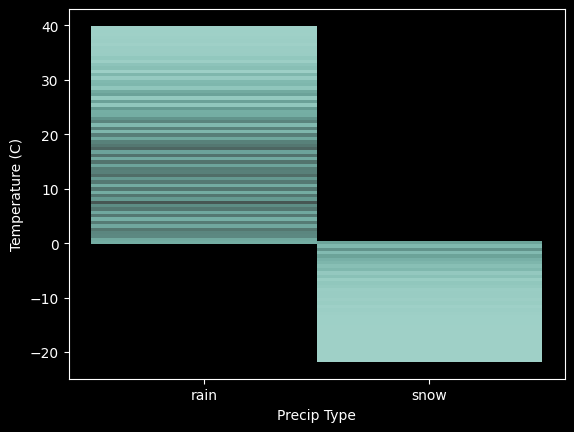

In [23]:
sns.histplot( x='Precip Type',y='Temperature (C)',data=df)

**Weather summary v/s temperature plot when the Precipitation type is Nan**

<Axes: xlabel='Summary', ylabel='Temperature (C)'>

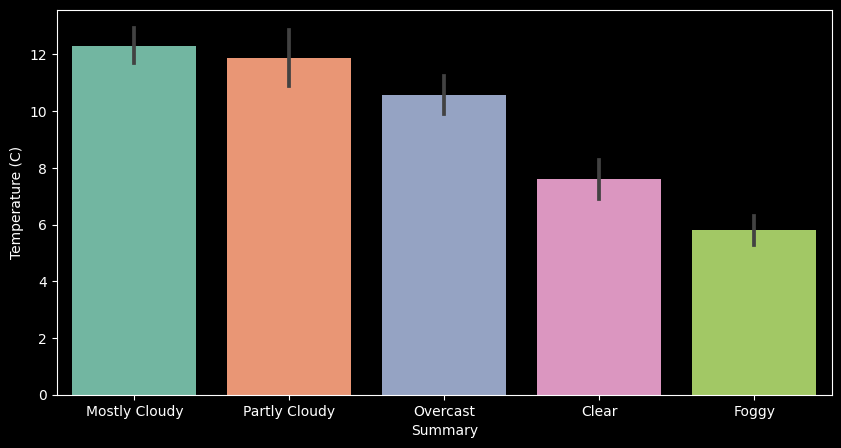

In [24]:
plt.figure(figsize=(10,5))
sns.barplot( x='Summary',y='Temperature (C)',data=df[['Summary','Precip Type','Temperature (C)']][df['Precip Type'].isna()],palette='Set2')

**From this plot we see that temperature is above 0 where the precipitation type is nan**

**Removing the nan values from precipitation type column by replacing with rain as the temperature is above 0**

In [25]:
df.fillna({'Precip Type':'rain'},inplace=True)

In [26]:
df.isna().sum()

Date                        0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Pressure (millibars)        0
Daily Summary               0
Dates                       0
Times                       0
year                        0
month                       0
dtype: int64

**No null values are present in the data frame**

In [27]:
df['Dates'].max()

Timestamp('2016-12-31 00:00:00')

In [28]:
df['Dates'].min()

Timestamp('2006-01-01 00:00:00')

**Weather data records from 1 Jan 2006 to 31 December 2016**

In [29]:
df.groupby(df['Precip Type'])

In [30]:
df.loc[ df['Temperature (C)']>0, 'Precip Type'] = 'rain'

In [31]:
df.loc[ df['Temperature (C)']<0, 'Precip Type'] = 'snow'

<Axes: xlabel='Precip Type', ylabel='Temperature (C)'>

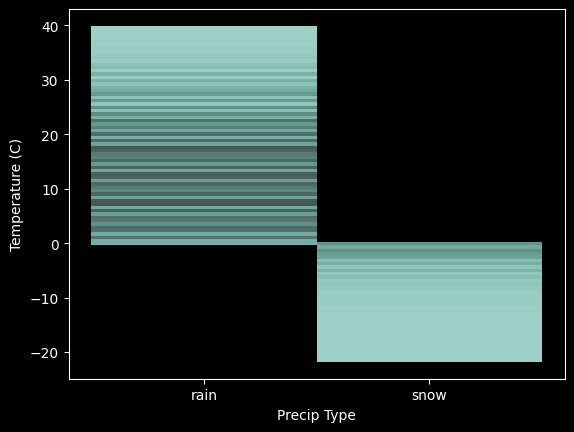

In [32]:
sns.histplot( x='Precip Type',y='Temperature (C)',data=df)

# Humidity Check

In [33]:
df.groupby(['year'],as_index=False)['Humidity'].mean()

,year,Humidity
0,2006,0.767341
1,2007,0.689652
2,2008,0.701237
3,2009,0.707247
4,2010,0.796858
5,2011,0.736017
6,2012,0.689500
7,2013,0.754209
8,2014,0.748578
9,2015,0.732355


<Axes: xlabel='year', ylabel='Humidity'>

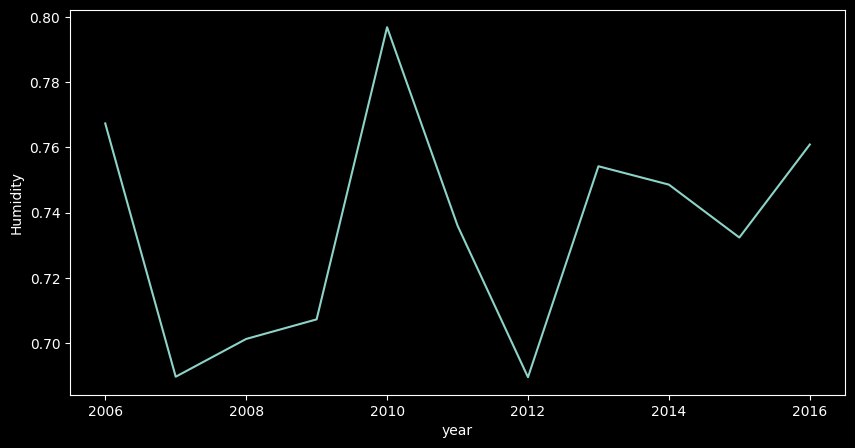

In [34]:
plt.figure(figsize=(10,5))
sns.lineplot( x='year',y='Humidity',data=df.groupby(['year'],as_index=False)['Humidity'].mean())

**With this graph we can say that the humidity is increasing successively and will increase even more in the upcomming years,so to reduce or maintain the humidity measures should be taken to maintain a healthy environment**

# Grouping by Month

**Minimum Temperature**

In [35]:
df.groupby(['month','year'],as_index=False)['Temperature (C)'].min()

,month,year,Temperature (C)
0,1,2006,-14.09
1,1,2007,-5.98
2,1,2008,-11.13
3,1,2009,-15.00
4,1,2010,-13.83
...,...,...,...
127,12,2012,-13.23
128,12,2013,-7.08
129,12,2014,-13.26
130,12,2015,-7.36


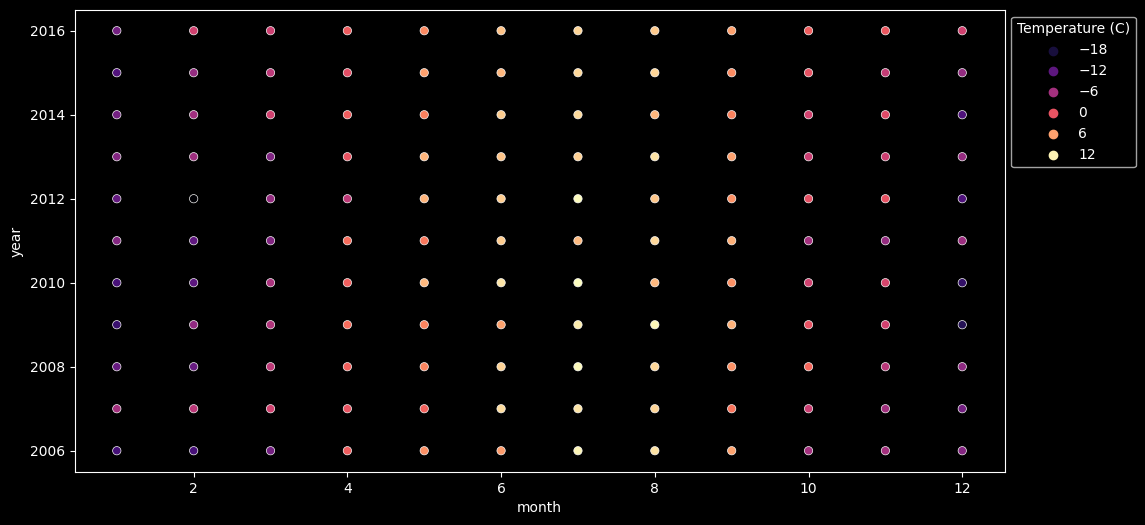

In [36]:
plt.figure(figsize=(12,6))
ax=sns.scatterplot( y='year',x='month',hue='Temperature (C)',data=df.groupby(['month','year'],as_index=False)['Temperature (C)'].min(),palette="magma")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

**Maximum Temperature**

In [37]:
df.groupby(['month','year'],as_index=False)['Temperature (C)'].max()

,month,year,Temperature (C)
0,1,2006,7.51
1,1,2007,15.74
2,1,2008,12.78
3,1,2009,12.61
4,1,2010,11.89
...,...,...,...
127,12,2012,11.89
128,12,2013,12.87
129,12,2014,12.25
130,12,2015,13.44


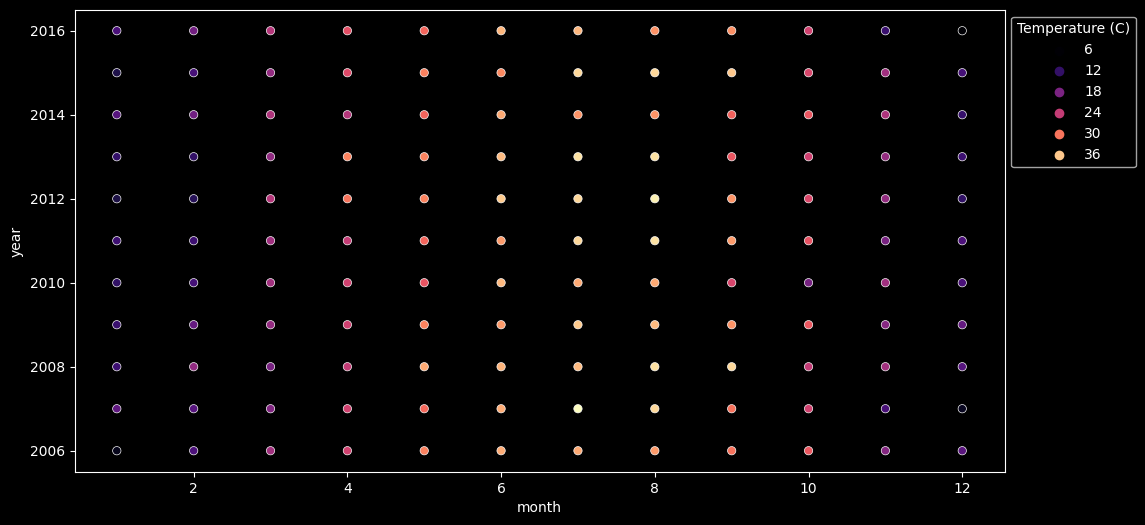

In [38]:
plt.figure(figsize=(12,6))
ax=sns.scatterplot( y='year',x='month',hue='Temperature (C)',data=df.groupby(['month','year'],as_index=False)['Temperature (C)'].max(),palette='magma')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

**Analysing this graphs we can say April,May,June,July are the warmest month of the year with more temperature**

**Analysing this graphs we can say January,February,November,December are the coldest month of the year**

# Grouping by month the full dataframe

In [39]:
m=df.groupby(['month'],as_index=False)
for month,monthdf in m:
    print(month)
    print(monthdf)

(1,)
                            Date        Summary Precip Type  Temperature (C)   
2880   2006-01-01 00:00:00+01:00  Partly Cloudy        rain             0.58  \
2881   2006-01-01 01:00:00+01:00  Mostly Cloudy        rain             1.16   
2882   2006-01-01 02:00:00+01:00  Mostly Cloudy        rain             1.67   
2883   2006-01-01 03:00:00+01:00       Overcast        rain             1.71   
2884   2006-01-01 04:00:00+01:00  Mostly Cloudy        rain             1.18   
...                          ...            ...         ...              ...   
91312  2016-01-09 19:00:00+01:00  Mostly Cloudy        rain             2.81   
91313  2016-01-09 20:00:00+01:00  Mostly Cloudy        rain             2.64   
91314  2016-01-09 21:00:00+01:00       Overcast        rain             2.64   
91315  2016-01-09 22:00:00+01:00       Overcast        rain             1.99   
91316  2016-01-09 23:00:00+01:00       Overcast        rain             3.15   

       Apparent Temperature (C)  H

# January Data-1

In [40]:
m.get_group(1)

,Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,Dates,Times,year,month
2880,2006-01-01 00:00:00+01:00,Partly Cloudy,rain,0.58,-4.05,0.89,17.11,140,9.98,1016.66,Mostly cloudy throughout the day.,2006-01-01,00:00:00,2006,1
2881,2006-01-01 01:00:00+01:00,Mostly Cloudy,rain,1.16,-3.24,0.85,16.62,139,9.90,1016.15,Mostly cloudy throughout the day.,2006-01-01,01:00:00,2006,1
2882,2006-01-01 02:00:00+01:00,Mostly Cloudy,rain,1.67,-3.16,0.82,20.25,140,9.90,1015.87,Mostly cloudy throughout the day.,2006-01-01,02:00:00,2006,1
2883,2006-01-01 03:00:00+01:00,Overcast,rain,1.71,-2.19,0.82,14.49,140,9.90,1015.56,Mostly cloudy throughout the day.,2006-01-01,03:00:00,2006,1
2884,2006-01-01 04:00:00+01:00,Mostly Cloudy,rain,1.18,-2.74,0.86,13.94,134,9.90,1014.98,Mostly cloudy throughout the day.,2006-01-01,04:00:00,2006,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91312,2016-01-09 19:00:00+01:00,Mostly Cloudy,rain,2.81,0.38,0.95,8.69,139,4.78,1008.46,Foggy starting overnight continuing until even...,2016-01-09,19:00:00,2016,1
91313,2016-01-09 20:00:00+01:00,Mostly Cloudy,rain,2.64,-0.31,1.00,10.71,148,5.88,1007.73,Foggy starting overnight continuing until even...,2016-01-09,20:00:00,2016,1
91314,2016-01-09 21:00:00+01:00,Overcast,rain,2.64,-0.31,1.00,10.69,149,5.86,1007.44,Foggy starting overnight continuing until even...,2016-01-09,21:00:00,2016,1
91315,2016-01-09 22:00:00+01:00,Overcast,rain,1.99,0.17,0.95,6.31,142,5.75,1007.29,Foggy starting overnight continuing until even...,2016-01-09,22:00:00,2016,1


In [41]:
m.get_group(1)['Temperature (C)'].max()

15.74

In [42]:
m.get_group(1)['Temperature (C)'].min()

-15.0

**1.Maximum temperature Year wise analysis**

In [43]:
m.get_group(1).groupby(['year'],as_index=False)['Temperature (C)'].max()

,year,Temperature (C)
0,2006,7.51
1,2007,15.74
2,2008,12.78
3,2009,12.61
4,2010,11.89
5,2011,12.84
6,2012,10.00
7,2013,12.11
8,2014,14.77
9,2015,10.27


<Axes: xlabel='year', ylabel='Temperature (C)'>

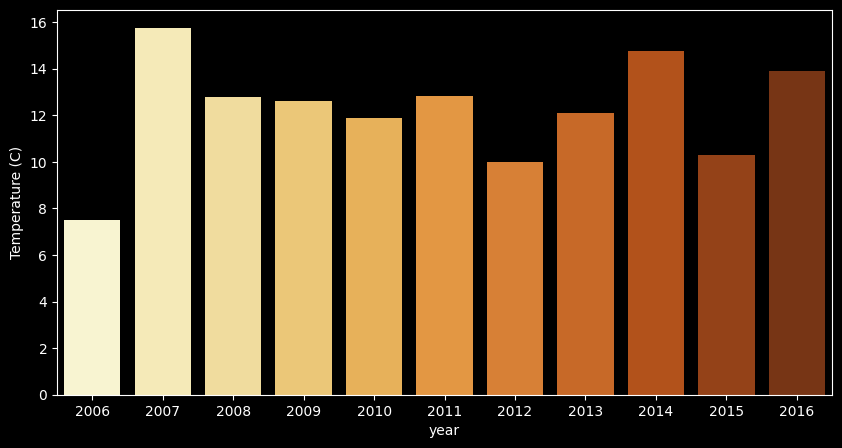

In [44]:
plt.figure(figsize=(10,5))
sns.barplot( x='year',y='Temperature (C)',data= m.get_group(1).groupby(['year'],as_index=False)['Temperature (C)'].max(),palette="YlOrBr")

**2.Minimum temperature Year wise analysis**

In [45]:
m.get_group(1).groupby(['year'],as_index=False)['Temperature (C)'].min()

,year,Temperature (C)
0,2006,-14.09
1,2007,-5.98
2,2008,-11.13
3,2009,-15.00
4,2010,-13.83
5,2011,-8.73
6,2012,-11.28
7,2013,-8.72
8,2014,-10.16
9,2015,-13.07


<Axes: xlabel='year', ylabel='Temperature (C)'>

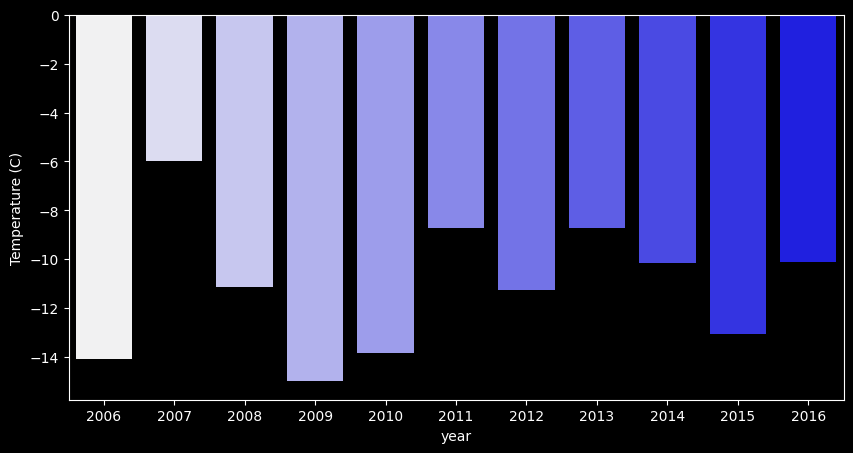

In [46]:
plt.figure(figsize=(10,5))
sns.barplot( x='year',y='Temperature (C)',data= m.get_group(1).groupby(['year'],as_index=False)['Temperature (C)'].min(),palette="light:b")

**3.Average humidity on the month of January Year wise**

In [47]:
m.get_group(1).groupby(['year'],as_index=False)['Humidity'].mean()

,year,Humidity
0,2006,0.834651
1,2007,0.813589
2,2008,0.819570
3,2009,0.867581
4,2010,0.875981
5,2011,0.922030
6,2012,0.797581
7,2013,0.883306
8,2014,0.846371
9,2015,0.831384


<Axes: xlabel='year', ylabel='Humidity'>

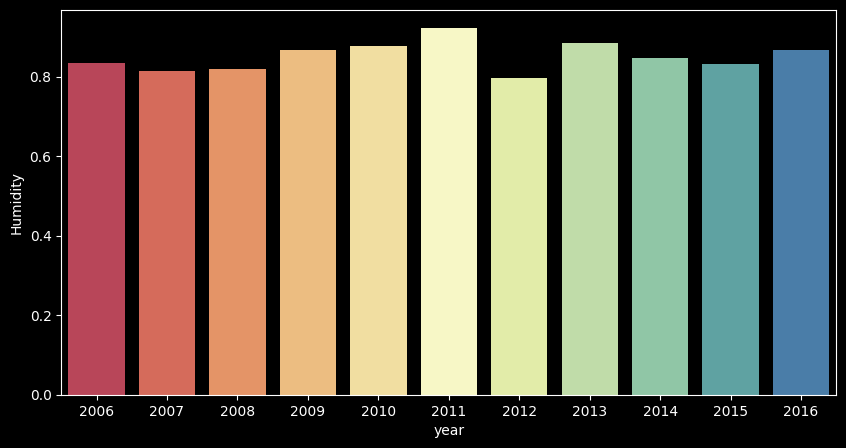

In [48]:
plt.figure(figsize=(10,5))
sns.barplot( x='year',y='Humidity',data= m.get_group(1).groupby(['year'],as_index=False)['Humidity'].mean(),palette="Spectral")

**4.Average wind speed on the month of January Year wise**

In [49]:
m.get_group(1).groupby(['year'],as_index=False)['Wind Speed (km/h)'].mean()

,year,Wind Speed (km/h)
0,2006,8.902258
1,2007,14.201707
2,2008,12.231465
3,2009,9.724073
4,2010,10.589704
5,2011,9.689489
6,2012,12.703226
7,2013,12.593535
8,2014,11.864435
9,2015,13.075094


<Axes: xlabel='year', ylabel='Wind Speed (km/h)'>

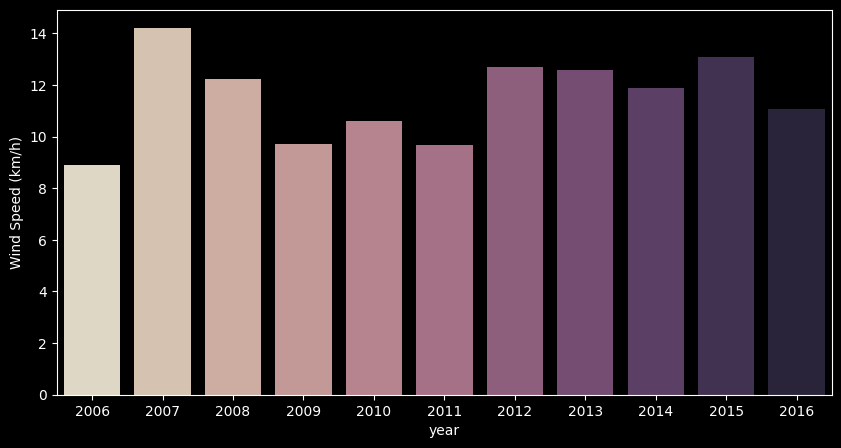

In [50]:
plt.figure(figsize=(10,5))
sns.barplot( x='year',y='Wind Speed (km/h)',data= m.get_group(1).groupby(['year'],as_index=False)['Wind Speed (km/h)'].mean(),palette="ch:s=-.2,r=.6")

**5.Average pressure on the month of January Year wise**

In [51]:
 m.get_group(1).groupby(['year'],as_index=False)['Pressure (millibars)'].mean()

,year,Pressure (millibars)
0,2006,1021.193508
1,2007,1007.607030
2,2008,1021.194140
3,2009,1015.820497
4,2010,1015.022030
5,2011,1021.898306
6,2012,1018.944382
7,2013,997.585296
8,2014,1013.130134
9,2015,917.056142


<Axes: xlabel='year', ylabel='Pressure (millibars)'>

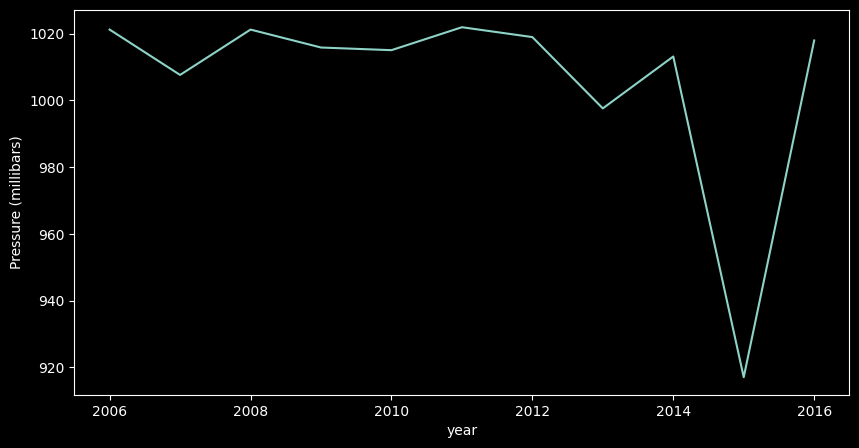

In [52]:
plt.figure(figsize=(10,5))
sns.lineplot( x='year',y='Pressure (millibars)',data= m.get_group(1).groupby(['year'],as_index=False)['Pressure (millibars)'].mean())

**6.Visibility on the month of January Year wise**

In [53]:
m.get_group(1)['Visibility (km)'].max()

16.1

In [54]:
m.get_group(1)['Visibility (km)'].min()

0.0

**7.Visibility Maximum**

In [55]:
m.get_group(1).groupby(['year'],as_index=False)['Visibility (km)'].max()

,year,Visibility (km)
0,2006,15.87
1,2007,15.87
2,2008,15.87
3,2009,16.10
4,2010,15.83
5,2011,15.83
6,2012,16.10
7,2013,15.87
8,2014,16.10
9,2015,16.10


**8.Visibility Minimum**

In [56]:
m.get_group(1).groupby(['year'],as_index=False)['Visibility (km)'].min()

,year,Visibility (km)
0,2006,0.24
1,2007,0.68
2,2008,0.00
3,2009,0.00
4,2010,0.16
5,2011,0.00
6,2012,0.00
7,2013,0.16
8,2014,0.00
9,2015,0.00


**9.Visibility Average**

In [57]:
m.get_group(1).groupby(['year'],as_index=False)['Visibility (km)'].mean()

,year,Visibility (km)
0,2006,7.901358
1,2007,10.298683
2,2008,7.304677
3,2009,5.961384
4,2010,5.647567
5,2011,5.960981
6,2012,9.773481
7,2013,8.201546
8,2014,8.501317
9,2015,8.367298


<Axes: xlabel='year', ylabel='Visibility (km)'>

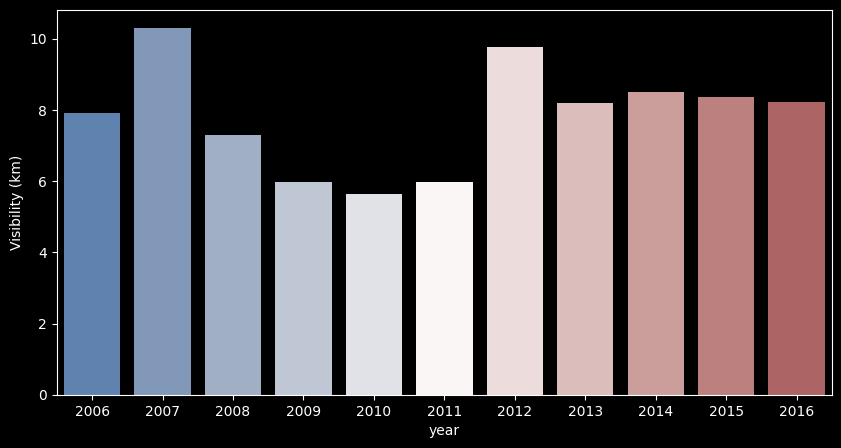

In [58]:
plt.figure(figsize=(10,5))
sns.barplot( x='year',y='Visibility (km)',data= m.get_group(1).groupby(['year'],as_index=False)['Visibility (km)'].mean(),palette="vlag")

**10.Day to day weather summary**

<Axes: xlabel='count', ylabel='Summary'>

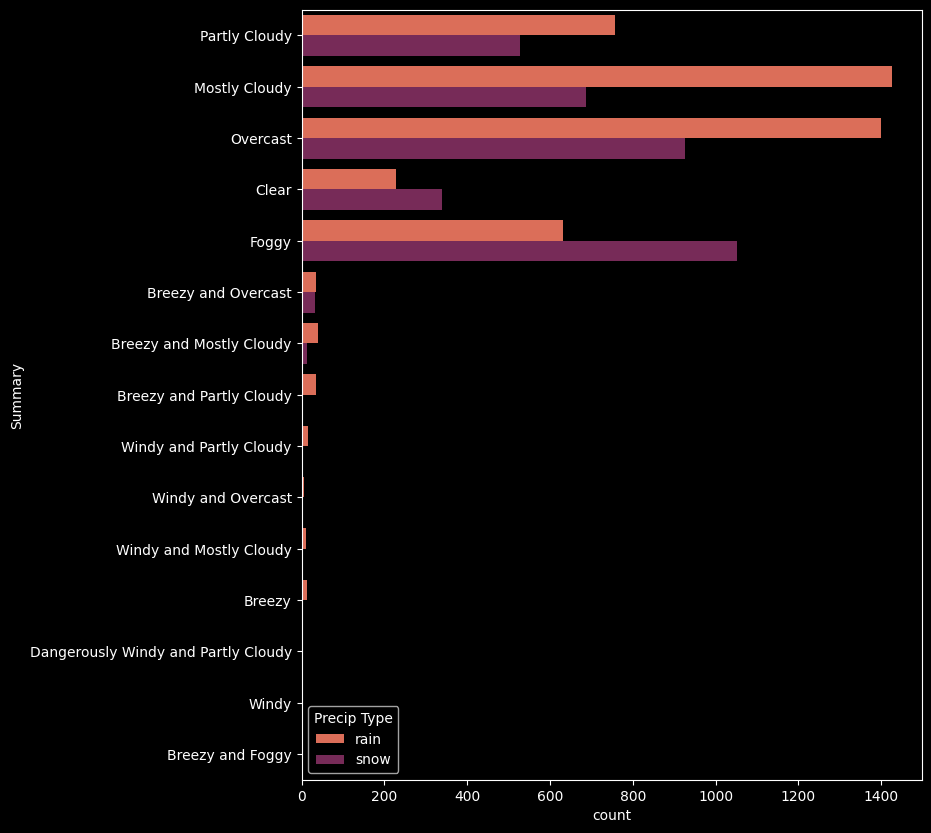

In [59]:
plt.figure(figsize=(8,10))
sns.countplot(y='Summary',data= m.get_group(1),palette="rocket_r",hue='Precip Type')

# February Data-2

In [60]:
m.get_group(2)

,Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,Dates,Times,year,month
2208,2006-02-01 00:00:00+01:00,Overcast,snow,-2.14,-6.20,0.86,11.27,320,4.83,1025.18,Mostly cloudy until night.,2006-02-01,00:00:00,2006,2
2209,2006-02-01 01:00:00+01:00,Overcast,snow,-2.47,-4.32,0.89,4.91,199,3.90,1023.23,Mostly cloudy until night.,2006-02-01,01:00:00,2006,2
2210,2006-02-01 02:00:00+01:00,Overcast,snow,-2.74,-2.74,0.89,3.22,90,4.36,1025.19,Mostly cloudy until night.,2006-02-01,02:00:00,2006,2
2211,2006-02-01 03:00:00+01:00,Overcast,snow,-2.19,-2.19,0.88,2.85,287,4.36,1025.25,Mostly cloudy until night.,2006-02-01,03:00:00,2006,2
2212,2006-02-01 04:00:00+01:00,Overcast,snow,-2.04,-2.04,0.87,3.36,229,4.73,1024.88,Mostly cloudy until night.,2006-02-01,04:00:00,2006,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90568,2016-02-09 19:00:00+01:00,Partly Cloudy,rain,12.02,12.02,0.67,13.59,160,10.22,1008.40,Mostly cloudy throughout the day.,2016-02-09,19:00:00,2016,2
90569,2016-02-09 20:00:00+01:00,Mostly Cloudy,rain,12.04,12.04,0.72,23.02,160,10.26,1007.32,Mostly cloudy throughout the day.,2016-02-09,20:00:00,2016,2
90570,2016-02-09 21:00:00+01:00,Mostly Cloudy,rain,11.48,11.48,0.72,24.50,160,16.10,1005.86,Mostly cloudy throughout the day.,2016-02-09,21:00:00,2016,2
90571,2016-02-09 22:00:00+01:00,Partly Cloudy,rain,9.39,6.97,0.80,16.71,170,15.18,1005.43,Mostly cloudy throughout the day.,2016-02-09,22:00:00,2016,2


In [61]:
m.get_group(2)['Temperature (C)'].max()

19.95

In [62]:
m.get_group(2)['Temperature (C)'].min()

-21.82

**1.Maximum temperature Year wise analysis**

In [63]:
m.get_group(2).groupby(['year'],as_index=False)['Temperature (C)'].max()

,year,Temperature (C)
0,2006,14.08
1,2007,14.97
2,2008,19.95
3,2009,16.11
4,2010,13.47
5,2011,12.78
6,2012,11.14
7,2013,12.07
8,2014,17.05
9,2015,13.69


<Axes: xlabel='year', ylabel='Temperature (C)'>

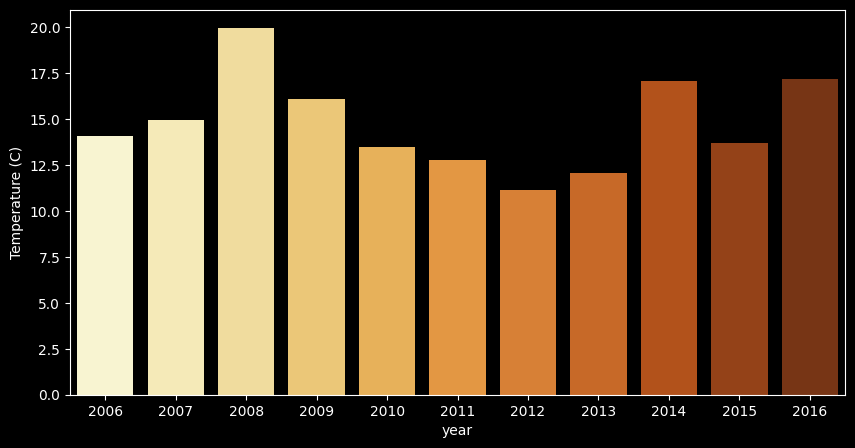

In [64]:
plt.figure(figsize=(10,5))
sns.barplot( x='year',y='Temperature (C)',data= m.get_group(2).groupby(['year'],as_index=False)['Temperature (C)'].max(),palette="YlOrBr")

**2.Minimum temperature Year wise analysis**

In [65]:
m.get_group(2).groupby(['year'],as_index=False)['Temperature (C)'].min()

,year,Temperature (C)
0,2006,-13.93
1,2007,-4.18
2,2008,-11.11
3,2009,-7.61
4,2010,-12.16
5,2011,-11.70
6,2012,-21.82
7,2013,-6.39
8,2014,-6.26
9,2015,-7.29


<Axes: xlabel='year', ylabel='Temperature (C)'>

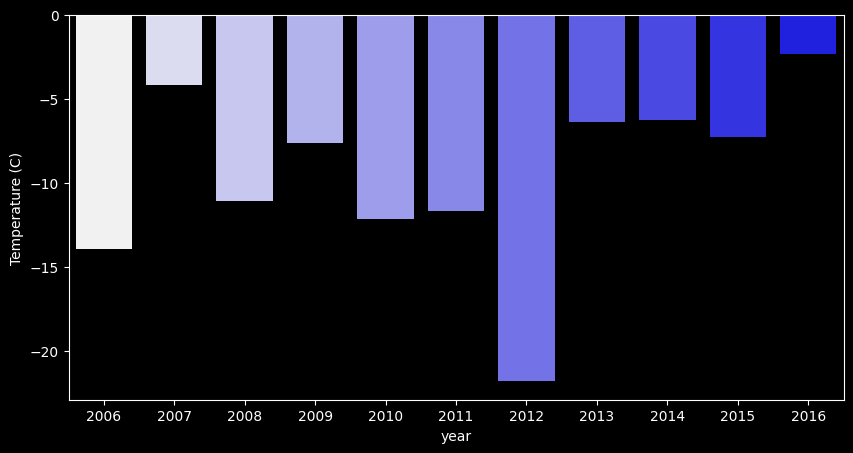

In [66]:
plt.figure(figsize=(10,5))
sns.barplot( x='year',y='Temperature (C)',data= m.get_group(2).groupby(['year'],as_index=False)['Temperature (C)'].min(),palette="light:b")

**3.Average humidity on the month of February Year wise**

In [67]:
m.get_group(2).groupby(['year'],as_index=False)['Humidity'].mean()

,year,Humidity
0,2006,0.843393
1,2007,0.815193
2,2008,0.682859
3,2009,0.821161
4,2010,0.851845
5,2011,0.854137
6,2012,0.762744
7,2013,0.869107
8,2014,0.812307
9,2015,0.803437


<Axes: xlabel='year', ylabel='Humidity'>

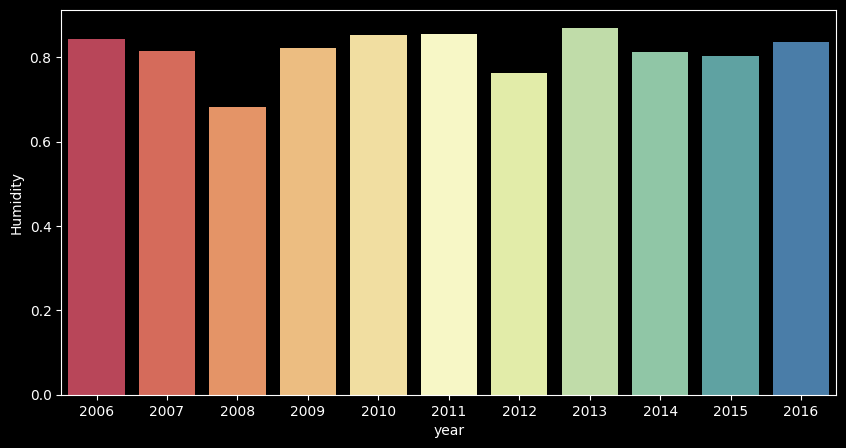

In [68]:
plt.figure(figsize=(10,5))
sns.barplot( x='year',y='Humidity',data= m.get_group(2).groupby(['year'],as_index=False)['Humidity'].mean(),palette="Spectral")

**4.Average wind speed on the month of January Year wise**

In [69]:
m.get_group(2).groupby(['year'],as_index=False)['Wind Speed (km/h)'].mean()

,year,Wind Speed (km/h)
0,2006,10.958408
1,2007,12.479658
2,2008,11.706954
3,2009,14.799390
4,2010,13.041443
5,2011,10.209077
6,2012,11.569914
7,2013,12.117574
8,2014,11.752143
9,2015,10.768720


<Axes: xlabel='year', ylabel='Wind Speed (km/h)'>

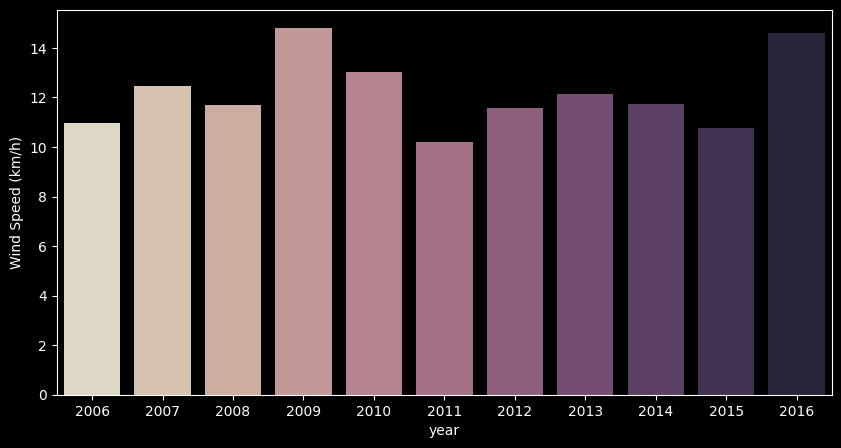

In [70]:
plt.figure(figsize=(10,5))
sns.barplot( x='year',y='Wind Speed (km/h)',data= m.get_group(2).groupby(['year'],as_index=False)['Wind Speed (km/h)'].mean(),palette="ch:s=-.2,r=.6")

**5.Average pressure on the month of February Year wise**

In [71]:
 m.get_group(2).groupby(['year'],as_index=False)['Pressure (millibars)'].mean()

,year,Pressure (millibars)
0,2006,995.210789
1,2007,1010.738080
2,2008,1016.191121
3,2009,1006.134167
4,2010,1008.867560
5,2011,1018.124970
6,2012,1022.426207
7,2013,921.667411
8,2014,1014.874464
9,2015,1017.230565


<Axes: xlabel='year', ylabel='Pressure (millibars)'>

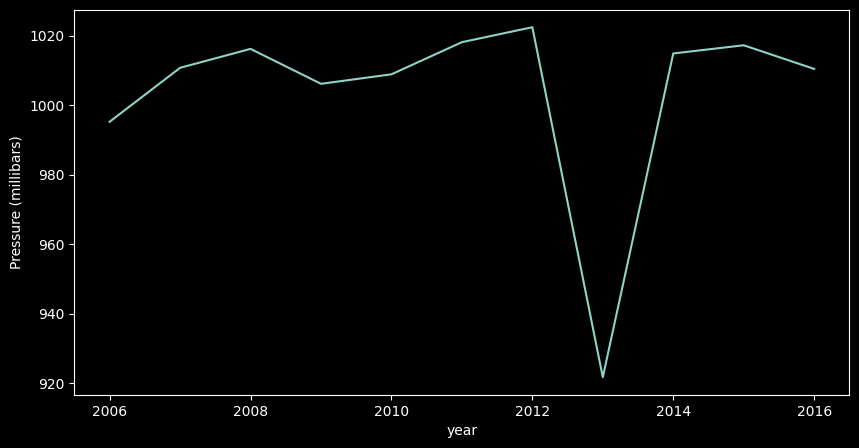

In [72]:
plt.figure(figsize=(10,5))
sns.lineplot( x='year',y='Pressure (millibars)',data= m.get_group(2).groupby(['year'],as_index=False)['Pressure (millibars)'].mean())

**6.Visibility on the month of February Year wise**

In [73]:
m.get_group(2)['Visibility (km)'].max()

16.1

In [74]:
m.get_group(2)['Visibility (km)'].min()

0.0

**7.Visibility Maximum**

In [75]:
m.get_group(2).groupby(['year'],as_index=False)['Visibility (km)'].max()

,year,Visibility (km)
0,2006,15.87
1,2007,15.87
2,2008,15.87
3,2009,16.10
4,2010,15.87
5,2011,15.87
6,2012,16.10
7,2013,15.87
8,2014,16.10
9,2015,16.10


**8.Visibility Minimum**

In [76]:
m.get_group(2).groupby(['year'],as_index=False)['Visibility (km)'].min()

,year,Visibility (km)
0,2006,0.00
1,2007,0.00
2,2008,0.00
3,2009,0.00
4,2010,0.16
5,2011,0.16
6,2012,0.00
7,2013,0.16
8,2014,0.14
9,2015,0.23


**9.Visibility Average**

In [77]:
m.get_group(2).groupby(['year'],as_index=False)['Visibility (km)'].mean()

,year,Visibility (km)
0,2006,7.421443
1,2007,9.538586
2,2008,9.608736
3,2009,9.659271
4,2010,7.008705
5,2011,6.617649
6,2012,7.150718
7,2013,8.949792
8,2014,10.662426
9,2015,8.431190


<Axes: xlabel='year', ylabel='Visibility (km)'>

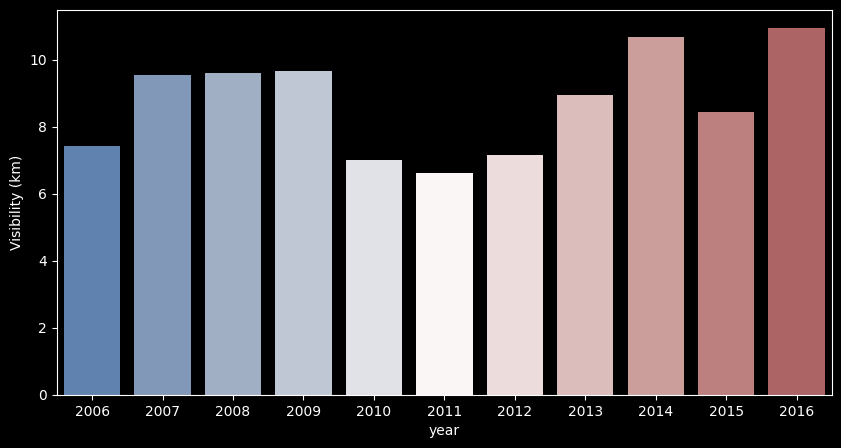

In [78]:
plt.figure(figsize=(10,5))
sns.barplot( x='year',y='Visibility (km)',data= m.get_group(2).groupby(['year'],as_index=False)['Visibility (km)'].mean(),palette="vlag")

**10.Day to day weather summary**

<Axes: xlabel='count', ylabel='Summary'>

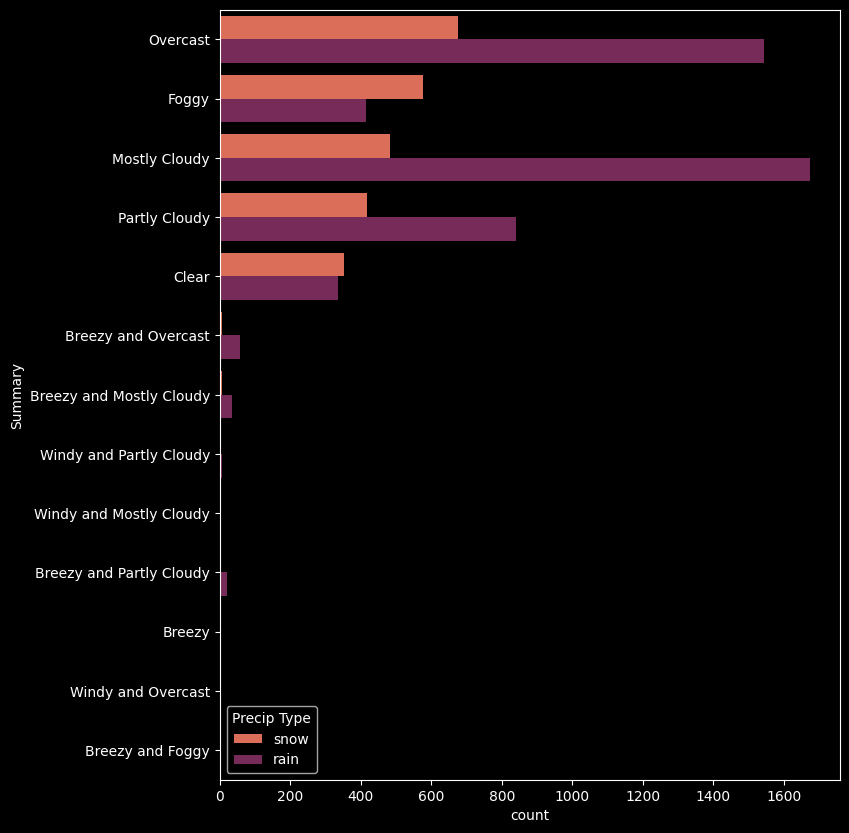

In [79]:
plt.figure(figsize=(8,10))
sns.countplot(y='Summary',data= m.get_group(2),palette="rocket_r",hue='Precip Type')

# March Data-3

In [80]:
m.get_group(3)

,Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,Dates,Times,year,month
5088,2006-03-01 00:00:00+01:00,Foggy,snow,-4.91,-9.28,0.91,10.42,317,3.20,1007.12,Mostly cloudy until evening.,2006-03-01,00:00:00,2006,3
5089,2006-03-01 01:00:00+01:00,Overcast,snow,-4.89,-7.43,0.92,5.59,298,3.83,1007.20,Mostly cloudy until evening.,2006-03-01,01:00:00,2006,3
5090,2006-03-01 02:00:00+01:00,Overcast,snow,-5.48,-8.51,0.92,6.42,285,5.04,1007.13,Mostly cloudy until evening.,2006-03-01,02:00:00,2006,3
5091,2006-03-01 03:00:00+01:00,Overcast,snow,-5.46,-8.56,0.92,6.58,267,5.04,1007.09,Mostly cloudy until evening.,2006-03-01,03:00:00,2006,3
5092,2006-03-01 04:00:00+01:00,Overcast,snow,-5.43,-7.92,0.92,5.33,231,5.43,1007.33,Mostly cloudy until evening.,2006-03-01,04:00:00,2006,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93519,2016-03-09 19:00:00+01:00,Partly Cloudy,rain,7.78,5.74,0.86,11.43,0,6.70,1010.03,Foggy in the morning.,2016-03-09,19:00:00,2016,3
93520,2016-03-09 20:00:00+01:00,Partly Cloudy,rain,7.11,4.81,0.93,12.08,10,6.07,1009.96,Foggy in the morning.,2016-03-09,20:00:00,2016,3
93521,2016-03-09 21:00:00+01:00,Partly Cloudy,rain,6.50,4.25,0.90,11.13,0,6.07,1009.56,Foggy in the morning.,2016-03-09,21:00:00,2016,3
93522,2016-03-09 22:00:00+01:00,Partly Cloudy,rain,5.60,3.14,0.96,11.25,1,6.65,1009.55,Foggy in the morning.,2016-03-09,22:00:00,2016,3


In [81]:
m.get_group(3)['Temperature (C)'].max()

22.82

In [82]:
m.get_group(3)['Temperature (C)'].min()

-10.1

**1.Maximum temperature Year wise analysis**

In [83]:
m.get_group(3).groupby(['year'],as_index=False)['Temperature (C)'].max()

,year,Temperature (C)
0,2006,21.18
1,2007,18.49
2,2008,17.73
3,2009,20.00
4,2010,21.16
5,2011,21.06
6,2012,22.78
7,2013,19.88
8,2014,22.34
9,2015,20.05


<Axes: xlabel='year', ylabel='Temperature (C)'>

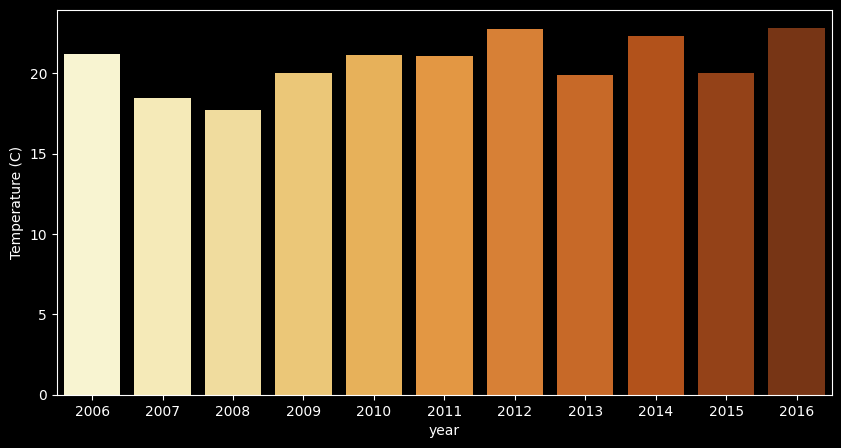

In [84]:
plt.figure(figsize=(10,5))
sns.barplot( x='year',y='Temperature (C)',data= m.get_group(3).groupby(['year'],as_index=False)['Temperature (C)'].max(),palette="YlOrBr")

**2.Minimum temperature Year wise analysis**

In [85]:
m.get_group(3).groupby(['year'],as_index=False)['Temperature (C)'].min()

,year,Temperature (C)
0,2006,-10.10
1,2007,-2.24
2,2008,-3.93
3,2009,-5.00
4,2010,-5.47
5,2011,-8.82
6,2012,-7.22
7,2013,-8.98
8,2014,-2.26
9,2015,-4.01


<Axes: xlabel='year', ylabel='Temperature (C)'>

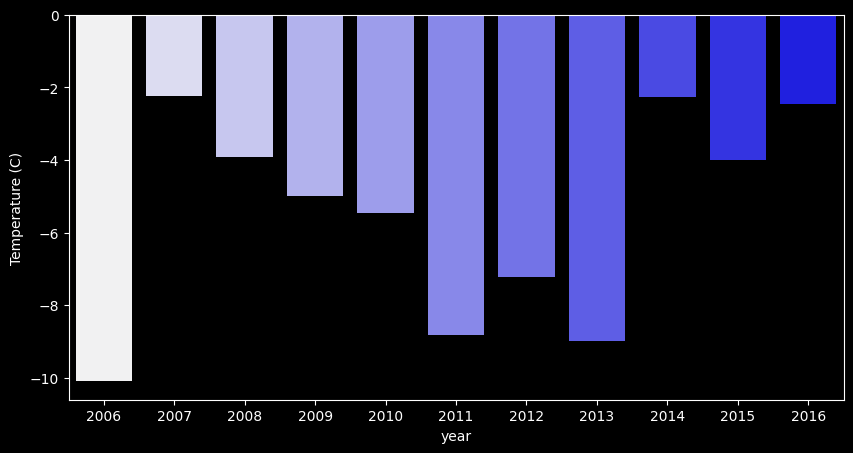

In [86]:
plt.figure(figsize=(10,5))
sns.barplot( x='year',y='Temperature (C)',data= m.get_group(3).groupby(['year'],as_index=False)['Temperature (C)'].min(),palette="light:b")

**3.Average humidity on the month of March Year wise**

In [87]:
m.get_group(3).groupby(['year'],as_index=False)['Humidity'].mean()

,year,Humidity
0,2006,0.778654
1,2007,0.713634
2,2008,0.668479
3,2009,0.696878
4,2010,0.669771
5,2011,0.782759
6,2012,0.536649
7,2013,0.810175
8,2014,0.640633
9,2015,0.669852


<Axes: xlabel='year', ylabel='Humidity'>

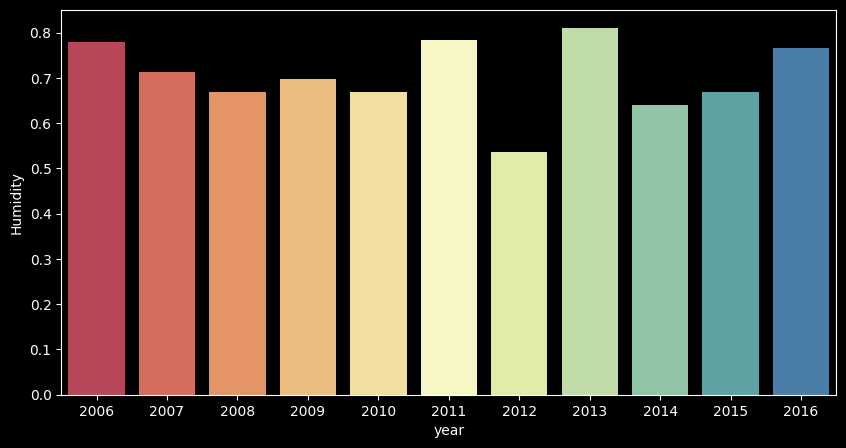

In [88]:
plt.figure(figsize=(10,5))
sns.barplot( x='year',y='Humidity',data= m.get_group(3).groupby(['year'],as_index=False)['Humidity'].mean(),palette="Spectral")

**4.Average wind speed on the month of March Year wise**

In [89]:
m.get_group(3).groupby(['year'],as_index=False)['Wind Speed (km/h)'].mean()

,year,Wind Speed (km/h)
0,2006,14.416635
1,2007,12.321803
2,2008,14.643324
3,2009,16.874764
4,2010,14.620929
5,2011,9.550444
6,2012,11.572127
7,2013,14.447550
8,2014,13.041332
9,2015,14.348587


<Axes: xlabel='year', ylabel='Wind Speed (km/h)'>

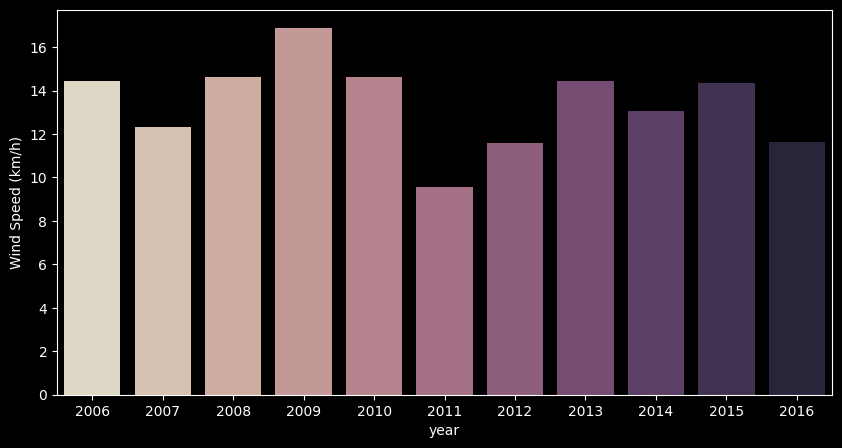

In [90]:
plt.figure(figsize=(10,5))
sns.barplot( x='year',y='Wind Speed (km/h)',data= m.get_group(3).groupby(['year'],as_index=False)['Wind Speed (km/h)'].mean(),palette="ch:s=-.2,r=.6")

**5.Average pressure on the month of March Year wise**

In [91]:
 m.get_group(3).groupby(['year'],as_index=False)['Pressure (millibars)'].mean()

,year,Pressure (millibars)
0,2006,976.372732
1,2007,1001.328533
2,2008,1004.624751
3,2009,963.639892
4,2010,1018.295249
5,2011,1003.965949
6,2012,1018.516931
7,2013,988.133351
8,2014,1016.302221
9,2015,1020.398573


<Axes: xlabel='year', ylabel='Pressure (millibars)'>

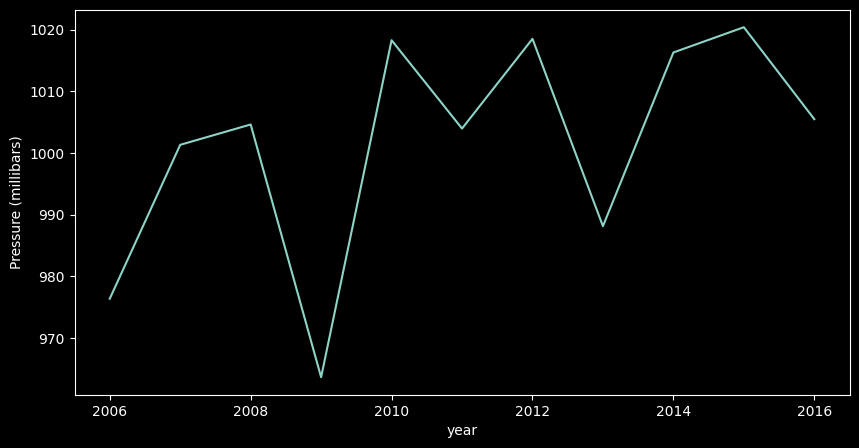

In [92]:
plt.figure(figsize=(10,5))
sns.lineplot( x='year',y='Pressure (millibars)',data= m.get_group(3).groupby(['year'],as_index=False)['Pressure (millibars)'].mean())

**6.Visibility on the month of March Year wise**

In [93]:
m.get_group(3)['Visibility (km)'].max()

16.1

In [94]:
m.get_group(3)['Visibility (km)'].min()

0.0

**7.Visibility Maximum**

In [95]:
m.get_group(3).groupby(['year'],as_index=False)['Visibility (km)'].max()

,year,Visibility (km)
0,2006,15.87
1,2007,15.83
2,2008,16.05
3,2009,16.10
4,2010,16.05
5,2011,16.10
6,2012,16.10
7,2013,15.87
8,2014,16.10
9,2015,16.10


**8.Visibility Minimum**

In [96]:
m.get_group(3).groupby(['year'],as_index=False)['Visibility (km)'].min()

,year,Visibility (km)
0,2006,0.35
1,2007,0.00
2,2008,0.16
3,2009,0.00
4,2010,0.61
5,2011,0.18
6,2012,0.00
7,2013,0.16
8,2014,1.32
9,2015,0.16


**9.Visibility Average**

In [97]:
m.get_group(3).groupby(['year'],as_index=False)['Visibility (km)'].mean()

,year,Visibility (km)
0,2006,9.577376
1,2007,11.013042
2,2008,11.067577
3,2009,11.172921
4,2010,10.635989
5,2011,8.659731
6,2012,11.534482
7,2013,9.529892
8,2014,13.804441
9,2015,11.851454


<Axes: xlabel='year', ylabel='Visibility (km)'>

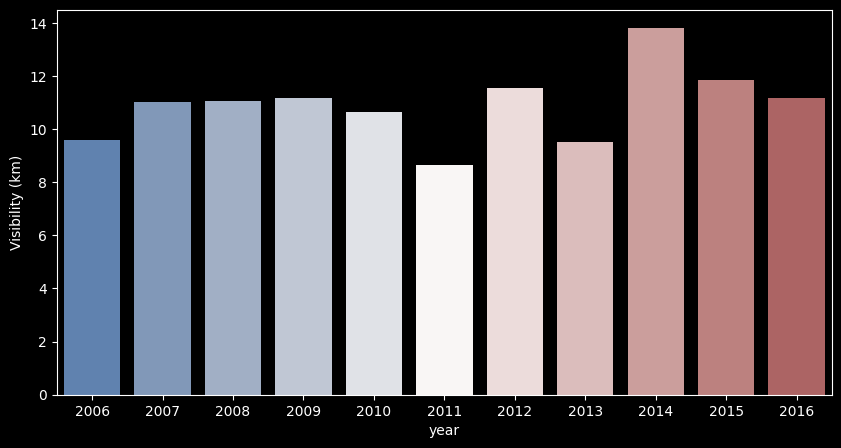

In [98]:
plt.figure(figsize=(10,5))
sns.barplot( x='year',y='Visibility (km)',data= m.get_group(3).groupby(['year'],as_index=False)['Visibility (km)'].mean(),palette="vlag")

**10.Day to day weather summary**

<Axes: xlabel='count', ylabel='Summary'>

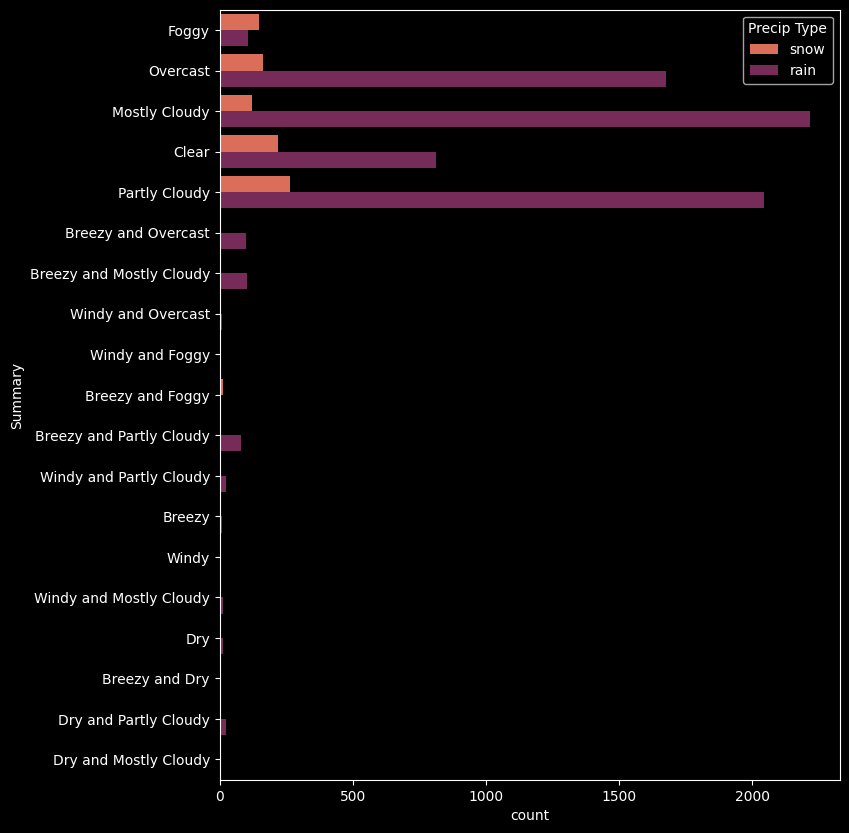

In [99]:
plt.figure(figsize=(8,10))
sns.countplot(y='Summary',data= m.get_group(3),palette="rocket_r",hue='Precip Type')

# April Data-4

In [100]:
m.get_group(4)

,Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,Dates,Times,year,month
0,2006-04-01 00:00:00+02:00,Partly Cloudy,rain,9.47,7.39,0.89,14.12,251,15.83,1015.13,Partly cloudy throughout the day.,2006-04-01,00:00:00,2006,4
1,2006-04-01 01:00:00+02:00,Partly Cloudy,rain,9.36,7.23,0.86,14.26,259,15.83,1015.63,Partly cloudy throughout the day.,2006-04-01,01:00:00,2006,4
2,2006-04-01 02:00:00+02:00,Mostly Cloudy,rain,9.38,9.38,0.89,3.93,204,14.96,1015.94,Partly cloudy throughout the day.,2006-04-01,02:00:00,2006,4
3,2006-04-01 03:00:00+02:00,Partly Cloudy,rain,8.29,5.94,0.83,14.10,269,15.83,1016.41,Partly cloudy throughout the day.,2006-04-01,03:00:00,2006,4
4,2006-04-01 04:00:00+02:00,Mostly Cloudy,rain,8.76,6.98,0.83,11.04,259,15.83,1016.51,Partly cloudy throughout the day.,2006-04-01,04:00:00,2006,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88384,2016-04-09 19:00:00+02:00,Overcast,rain,12.64,12.64,0.77,14.17,290,9.06,1002.85,Overcast throughout the day.,2016-04-09,19:00:00,2016,4
88385,2016-04-09 20:00:00+02:00,Overcast,rain,12.10,12.10,0.80,14.78,295,8.42,1003.67,Overcast throughout the day.,2016-04-09,20:00:00,2016,4
88386,2016-04-09 21:00:00+02:00,Overcast,rain,12.04,12.04,0.75,12.69,290,9.98,1004.44,Overcast throughout the day.,2016-04-09,21:00:00,2016,4
88387,2016-04-09 22:00:00+02:00,Overcast,rain,11.53,11.53,0.80,11.21,299,9.98,1004.63,Overcast throughout the day.,2016-04-09,22:00:00,2016,4


In [101]:
m.get_group(4)['Temperature (C)'].max()

31.06

In [102]:
m.get_group(4)['Temperature (C)'].min()

-3.89

**1.Maximum temperature Year wise analysis**

In [103]:
m.get_group(4).groupby(['year','Precip Type'],as_index=False)['Temperature (C)'].max()

,year,Precip Type,Temperature (C)
0,2006,rain,25.04
1,2007,rain,25.09
2,2008,rain,23.93
3,2009,rain,25.00
4,2010,rain,25.09
5,2011,rain,23.98
6,2012,rain,30.00
7,2012,snow,0.00
8,2013,rain,31.06
9,2014,rain,22.73


<Axes: xlabel='year', ylabel='Temperature (C)'>

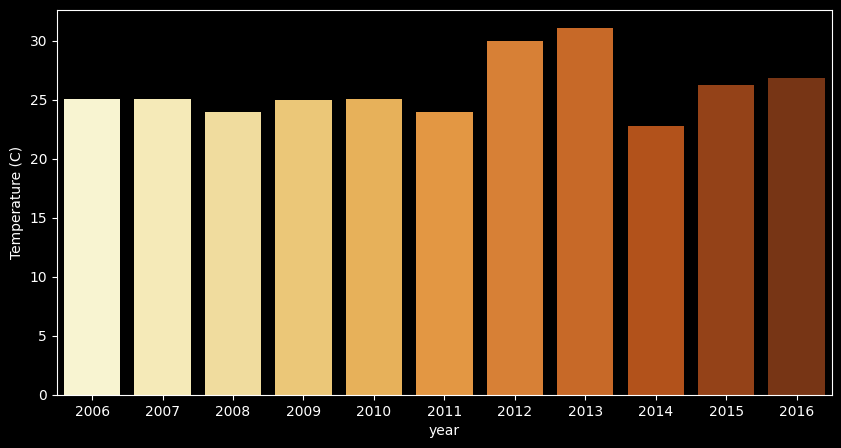

In [104]:
plt.figure(figsize=(10,5))
sns.barplot( x='year',y='Temperature (C)',data= m.get_group(4).groupby(['year'],as_index=False)['Temperature (C)'].max(),palette="YlOrBr")

**2.Minimum temperature Year wise analysis**

In [105]:
m.get_group(4).groupby(['year','Precip Type'],as_index=False)['Temperature (C)'].min()

,year,Precip Type,Temperature (C)
0,2006,rain,0.96
1,2007,rain,0.14
2,2008,rain,1.21
3,2009,rain,2.22
4,2010,rain,1.14
5,2011,rain,2.19
6,2012,rain,0.09
7,2012,snow,-3.89
8,2013,rain,0.07
9,2014,rain,1.07


<Axes: xlabel='year', ylabel='Temperature (C)'>

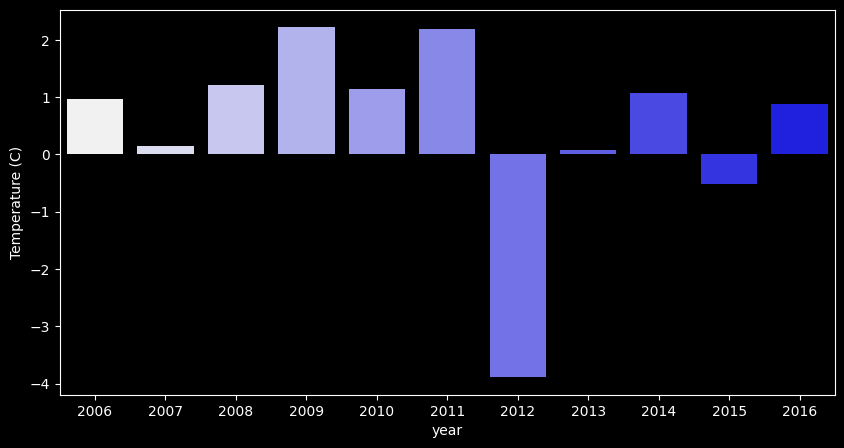

In [106]:
plt.figure(figsize=(10,5))
sns.barplot( x='year',y='Temperature (C)',data= m.get_group(4).groupby(['year'],as_index=False)['Temperature (C)'].min(),palette="light:b")

**3.Average humidity on the month of April Year wise**

In [107]:
m.get_group(4).groupby(['year'],as_index=False)['Humidity'].mean()

,year,Humidity
0,2006,0.729528
1,2007,0.536917
2,2008,0.692958
3,2009,0.567806
4,2010,0.707278
5,2011,0.592111
6,2012,0.650153
7,2013,0.678194
8,2014,0.690708
9,2015,0.547486


<Axes: xlabel='year', ylabel='Humidity'>

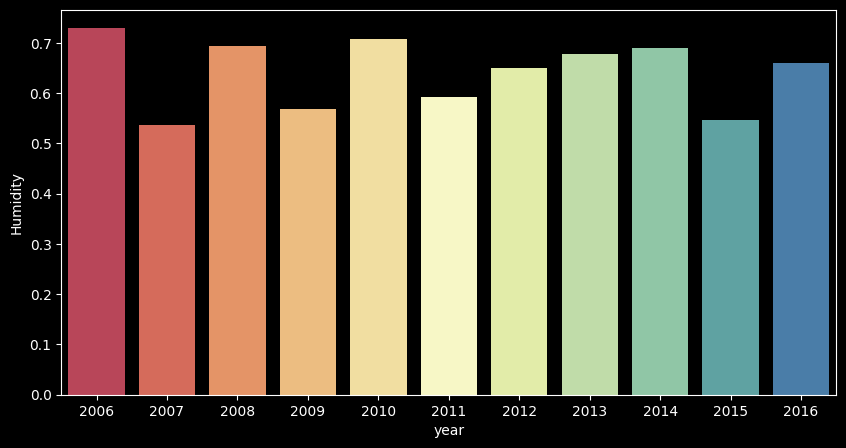

In [108]:
plt.figure(figsize=(10,5))
sns.barplot( x='year',y='Humidity',data= m.get_group(4).groupby(['year'],as_index=False)['Humidity'].mean(),palette="Spectral")

**4.Average wind speed on the month of April Year wise**

In [109]:
m.get_group(4).groupby(['year'],as_index=False)['Wind Speed (km/h)'].mean()

,year,Wind Speed (km/h)
0,2006,10.926861
1,2007,9.940347
2,2008,11.632083
3,2009,11.446736
4,2010,11.153000
5,2011,12.782681
6,2012,12.876194
7,2013,11.384736
8,2014,11.299472
9,2015,14.345958


<Axes: xlabel='year', ylabel='Wind Speed (km/h)'>

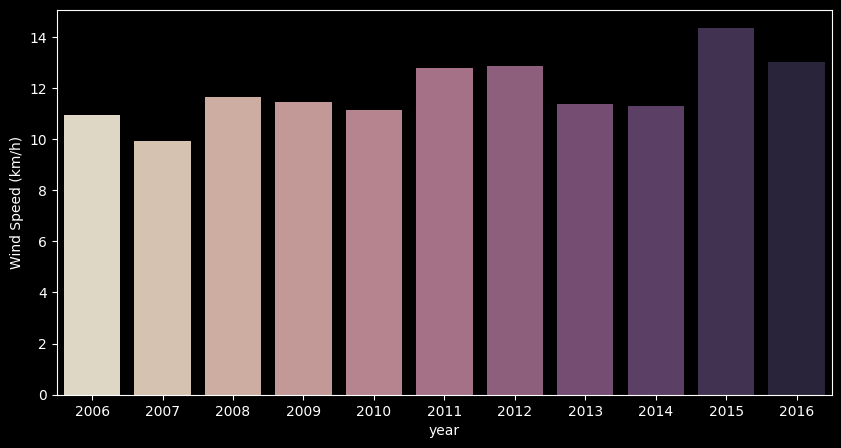

In [110]:
plt.figure(figsize=(10,5))
sns.barplot( x='year',y='Wind Speed (km/h)',data= m.get_group(4).groupby(['year'],as_index=False)['Wind Speed (km/h)'].mean(),palette="ch:s=-.2,r=.6")

**5.Average pressure on the month of april Year wise**

In [111]:
 m.get_group(4).groupby(['year'],as_index=False)['Pressure (millibars)'].mean()

,year,Pressure (millibars)
0,2006,1013.496472
1,2007,1009.761806
2,2008,1004.015389
3,2009,1011.672861
4,2010,1016.382764
5,2011,993.848014
6,2012,1003.911014
7,2013,1015.688028
8,2014,1012.424528
9,2015,1017.825403


<Axes: xlabel='year', ylabel='Pressure (millibars)'>

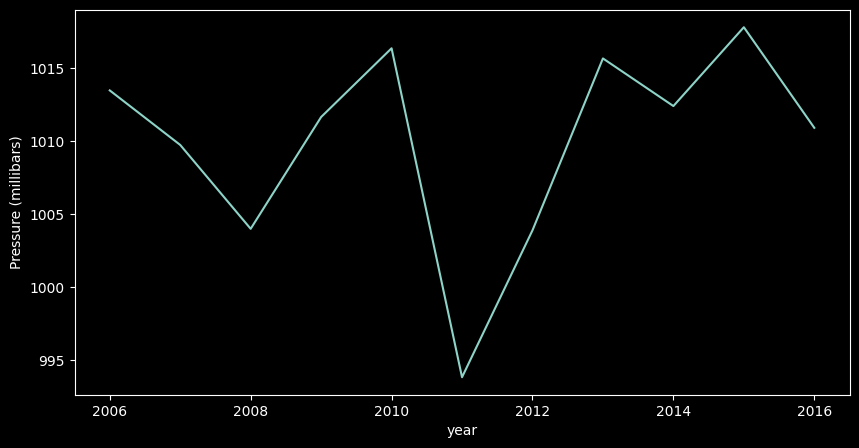

In [112]:
plt.figure(figsize=(10,5))
sns.lineplot( x='year',y='Pressure (millibars)',data= m.get_group(4).groupby(['year'],as_index=False)['Pressure (millibars)'].mean())

**6.Visibility on the month of April Year wise**

In [113]:
m.get_group(4)['Visibility (km)'].max()

16.1

In [114]:
m.get_group(4)['Visibility (km)'].min()

0.0

**7.Visibility Maximum**

In [115]:
m.get_group(4).groupby(['year'],as_index=False)['Visibility (km)'].max()

,year,Visibility (km)
0,2006,15.87
1,2007,16.10
2,2008,16.10
3,2009,16.10
4,2010,15.87
5,2011,16.10
6,2012,16.10
7,2013,15.87
8,2014,16.10
9,2015,16.10


**8.Visibility Minimum**

In [116]:
m.get_group(4).groupby(['year'],as_index=False)['Visibility (km)'].min()

,year,Visibility (km)
0,2006,0.29
1,2007,2.35
2,2008,1.85
3,2009,0.00
4,2010,0.29
5,2011,0.52
6,2012,0.00
7,2013,0.81
8,2014,0.16
9,2015,0.23


**9.Visibility Average**

In [117]:
m.get_group(4).groupby(['year'],as_index=False)['Visibility (km)'].mean()

,year,Visibility (km)
0,2006,10.627417
1,2007,11.959944
2,2008,11.100333
3,2009,11.576736
4,2010,10.436458
5,2011,11.390111
6,2012,11.210264
7,2013,11.005514
8,2014,12.801083
9,2015,14.191028


<Axes: xlabel='year', ylabel='Visibility (km)'>

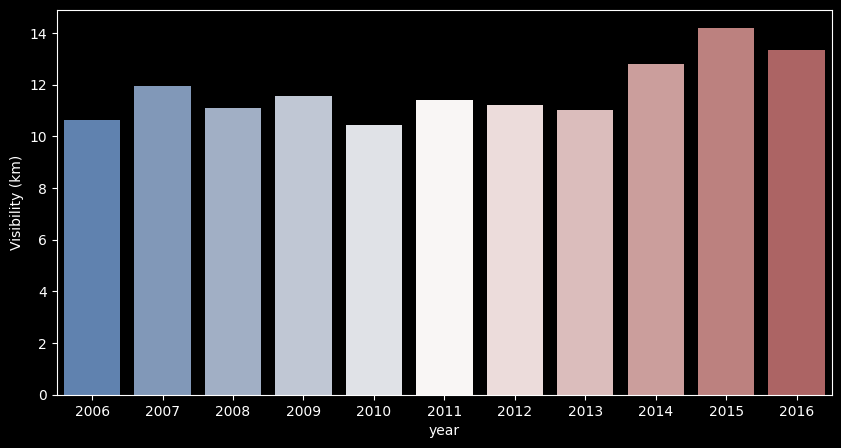

In [118]:
plt.figure(figsize=(10,5))
sns.barplot( x='year',y='Visibility (km)',data= m.get_group(4).groupby(['year'],as_index=False)['Visibility (km)'].mean(),palette="vlag")

**10.Day to day weather summary**

<Axes: xlabel='count', ylabel='Summary'>

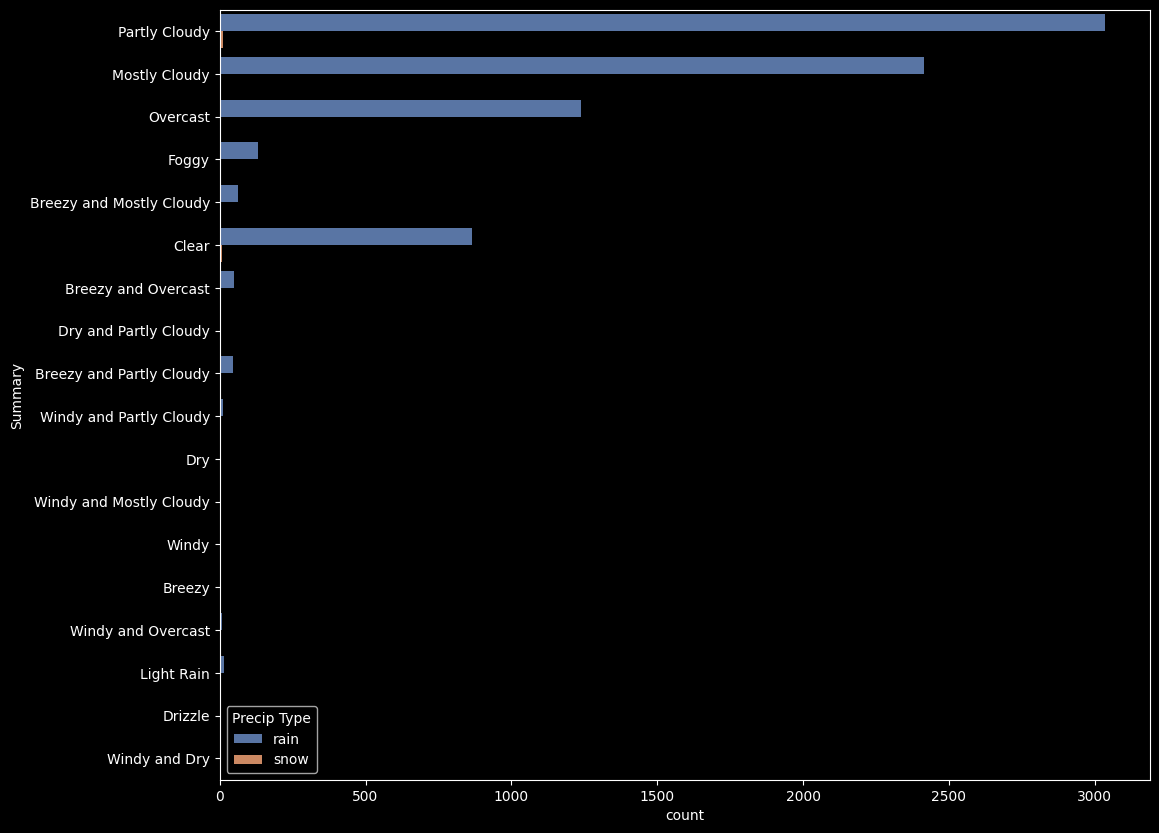

In [119]:
plt.figure(figsize=(12,10))
sns.countplot(y='Summary',hue='Precip Type',data= m.get_group(4),palette="deep")

# December Data-12

In [120]:
m.get_group(12)

,Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,Dates,Times,year,month
1464,2006-12-01 00:00:00+01:00,Overcast,rain,6.57,5.42,0.93,6.44,340,4.40,1038.06,Foggy in the morning.,2006-12-01,00:00:00,2006,12
1465,2006-12-01 01:00:00+01:00,Mostly Cloudy,rain,6.63,6.63,0.93,4.27,101,4.59,1034.84,Foggy in the morning.,2006-12-01,01:00:00,2006,12
1466,2006-12-01 02:00:00+01:00,Overcast,rain,6.62,5.55,0.96,6.18,25,4.35,1037.85,Foggy in the morning.,2006-12-01,02:00:00,2006,12
1467,2006-12-01 03:00:00+01:00,Overcast,rain,6.62,5.55,0.93,6.18,38,4.35,1037.67,Foggy in the morning.,2006-12-01,03:00:00,2006,12
1468,2006-12-01 04:00:00+01:00,Overcast,rain,6.15,5.00,0.96,6.20,53,3.67,1037.47,Foggy in the morning.,2006-12-01,04:00:00,2006,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89872,2016-12-09 19:00:00+01:00,Mostly Cloudy,rain,2.26,-0.53,0.86,9.72,166,8.24,1019.34,Mostly cloudy throughout the day.,2016-12-09,19:00:00,2016,12
89873,2016-12-09 20:00:00+01:00,Mostly Cloudy,rain,1.78,-1.04,0.88,9.50,167,7.47,1019.58,Mostly cloudy throughout the day.,2016-12-09,20:00:00,2016,12
89874,2016-12-09 21:00:00+01:00,Mostly Cloudy,rain,1.41,-1.48,0.90,9.50,170,9.79,1019.80,Mostly cloudy throughout the day.,2016-12-09,21:00:00,2016,12
89875,2016-12-09 22:00:00+01:00,Mostly Cloudy,rain,1.13,-1.84,0.91,9.58,174,8.61,1019.96,Mostly cloudy throughout the day.,2016-12-09,22:00:00,2016,12


In [121]:
m.get_group(12)['Temperature (C)'].max()

16.09

In [122]:
m.get_group(12)['Temperature (C)'].min()

-16.67

**1.Maximum temperature Year wise analysis**

In [123]:
m.get_group(12).groupby(['year'],as_index=False)['Temperature (C)'].max()

,year,Temperature (C)
0,2006,15.21
1,2007,7.92
2,2008,14.91
3,2009,16.09
4,2010,13.73
5,2011,13.98
6,2012,11.89
7,2013,12.87
8,2014,12.25
9,2015,13.44


<Axes: xlabel='year', ylabel='Temperature (C)'>

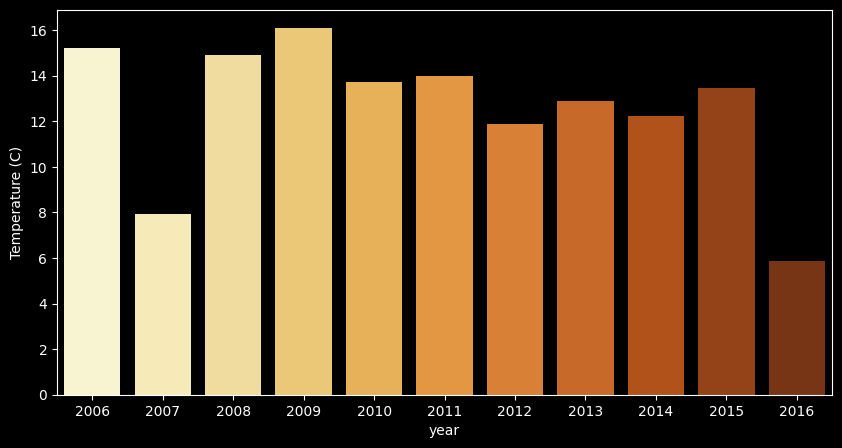

In [124]:
plt.figure(figsize=(10,5))
sns.barplot( x='year',y='Temperature (C)',data= m.get_group(12).groupby(['year'],as_index=False)['Temperature (C)'].max(),palette="YlOrBr")

**2.Minimum temperature Year wise analysis**

In [125]:
m.get_group(12).groupby(['year'],as_index=False)['Temperature (C)'].min()

,year,Temperature (C)
0,2006,-8.59
1,2007,-10.16
2,2008,-7.81
3,2009,-16.67
4,2010,-15.48
5,2011,-6.66
6,2012,-13.23
7,2013,-7.08
8,2014,-13.26
9,2015,-7.36


<Axes: xlabel='year', ylabel='Temperature (C)'>

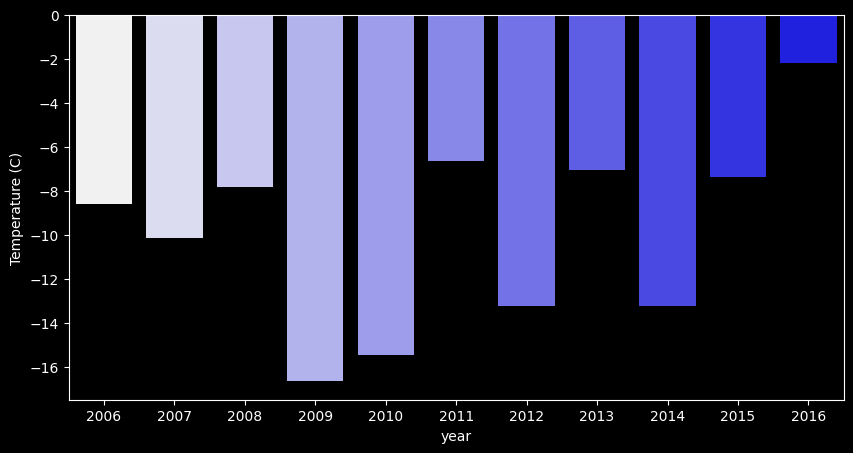

In [126]:
plt.figure(figsize=(10,5))
sns.barplot( x='year',y='Temperature (C)',data= m.get_group(12).groupby(['year'],as_index=False)['Temperature (C)'].min(),palette="light:b")

**3.Average humidity on the month of December Year wise**

In [127]:
m.get_group(12).groupby(['year'],as_index=False)['Humidity'].mean()

,year,Humidity
0,2006,0.905336
1,2007,0.856250
2,2008,0.828145
3,2009,0.844207
4,2010,0.913602
5,2011,0.866331
6,2012,0.886707
7,2013,0.824059
8,2014,0.836062
9,2015,0.925538


<Axes: xlabel='year', ylabel='Humidity'>

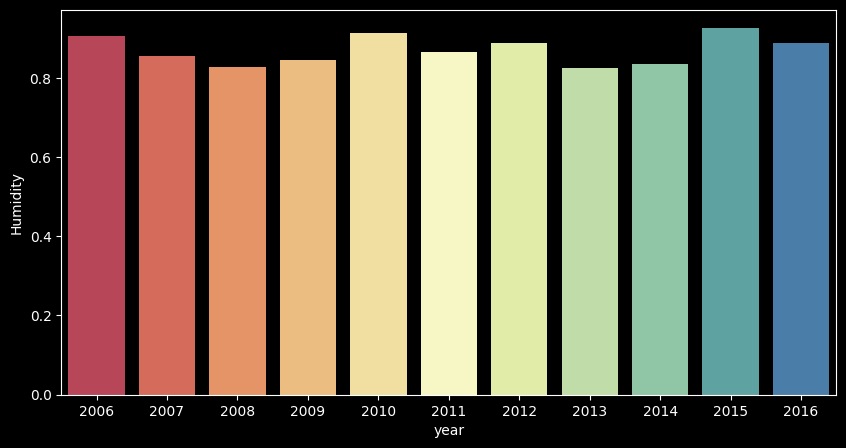

In [128]:
plt.figure(figsize=(10,5))
sns.barplot( x='year',y='Humidity',data= m.get_group(12).groupby(['year'],as_index=False)['Humidity'].mean(),palette="Spectral")

**4.Average wind speed on the month of December Year wise**

In [129]:
m.get_group(12).groupby(['year'],as_index=False)['Wind Speed (km/h)'].mean()

,year,Wind Speed (km/h)
0,2006,9.300726
1,2007,8.261142
2,2008,13.775699
3,2009,13.385806
4,2010,13.425820
5,2011,10.683427
6,2012,12.476210
7,2013,10.174624
8,2014,11.618965
9,2015,7.960887


<Axes: xlabel='year', ylabel='Wind Speed (km/h)'>

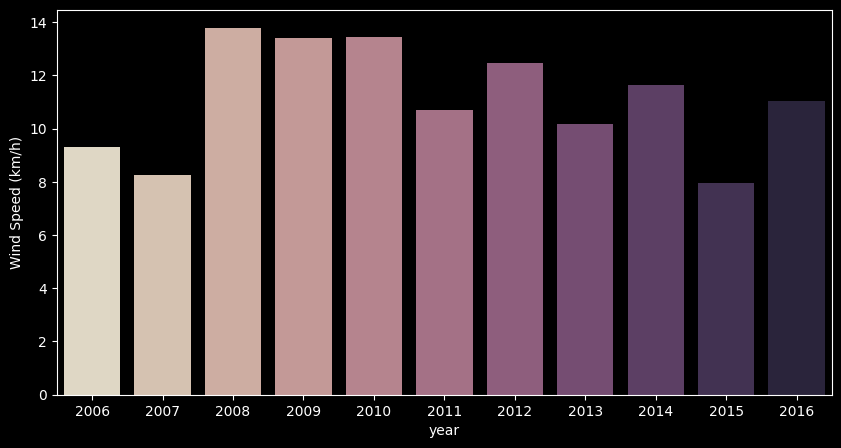

In [130]:
plt.figure(figsize=(10,5))
sns.barplot( x='year',y='Wind Speed (km/h)',data= m.get_group(12).groupby(['year'],as_index=False)['Wind Speed (km/h)'].mean(),palette="ch:s=-.2,r=.6")

**5.Average pressure on the month of December Year wise**

In [131]:
 m.get_group(5).groupby(['year'],as_index=False)['Pressure (millibars)'].mean()

,year,Pressure (millibars)
0,2006,1016.624651
1,2007,1009.050914
2,2008,1009.495605
3,2009,1014.902728
4,2010,943.473656
5,2011,1016.417890
6,2012,981.391331
7,2013,1010.995457
8,2014,1010.219368
9,2015,1013.269328


<Axes: xlabel='year', ylabel='Pressure (millibars)'>

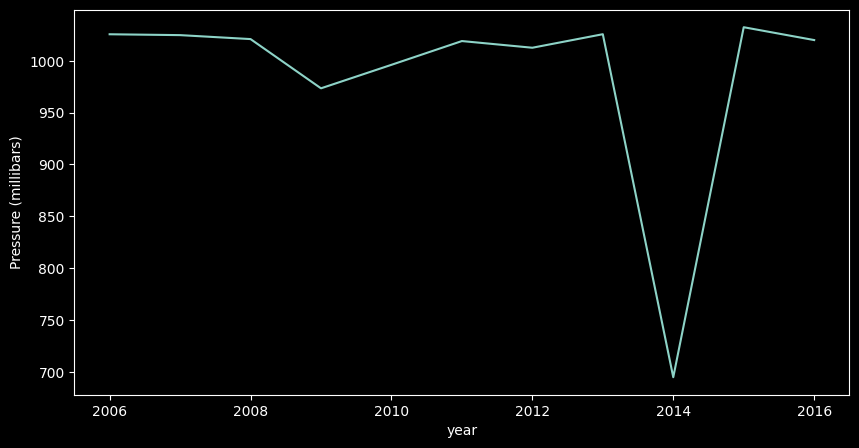

In [132]:
plt.figure(figsize=(10,5))
sns.lineplot( x='year',y='Pressure (millibars)',data= m.get_group(12).groupby(['year'],as_index=False)['Pressure (millibars)'].mean())

**6.Visibility on the month of December Year wise**

In [133]:
m.get_group(12)['Visibility (km)'].max()

16.1

In [134]:
m.get_group(12)['Visibility (km)'].min()

0.0

**7.Visibility Maximum**

In [135]:
m.get_group(12).groupby(['year'],as_index=False)['Visibility (km)'].max()

,year,Visibility (km)
0,2006,16.10
1,2007,15.83
2,2008,15.87
3,2009,16.10
4,2010,15.87
5,2011,15.87
6,2012,15.87
7,2013,16.10
8,2014,16.10
9,2015,16.10


**8.Visibility Minimum**

In [136]:
m.get_group(12).groupby(['year'],as_index=False)['Visibility (km)'].min()

,year,Visibility (km)
0,2006,0.00
1,2007,0.16
2,2008,0.16
3,2009,0.00
4,2010,0.02
5,2011,0.16
6,2012,0.16
7,2013,0.00
8,2014,0.00
9,2015,0.00


**9.Visibility Average**

In [137]:
m.get_group(12).groupby(['year'],as_index=False)['Visibility (km)'].mean()

,year,Visibility (km)
0,2006,5.190296
1,2007,5.684933
2,2008,8.664852
3,2009,7.577352
4,2010,6.471317
5,2011,7.543038
6,2012,7.219355
7,2013,7.913078
8,2014,6.450820
9,2015,4.327258


<Axes: xlabel='year', ylabel='Visibility (km)'>

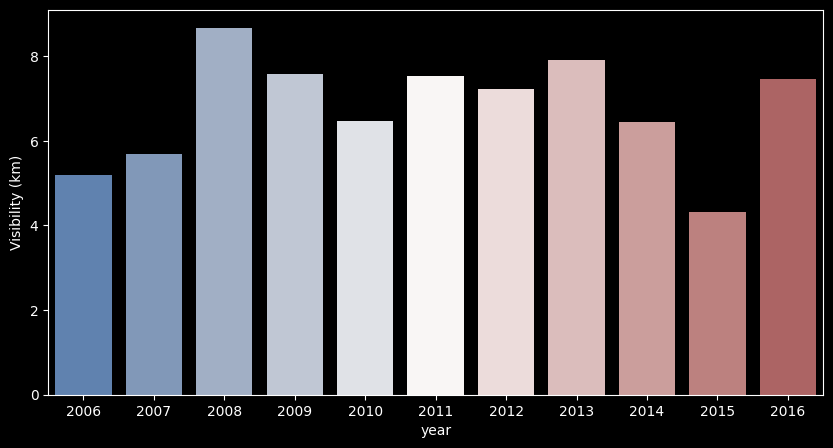

In [138]:
plt.figure(figsize=(10,5))
sns.barplot( x='year',y='Visibility (km)',data= m.get_group(12).groupby(['year'],as_index=False)['Visibility (km)'].mean(),palette="vlag")

**10.Day to day weather summary**

<Axes: xlabel='count', ylabel='Summary'>

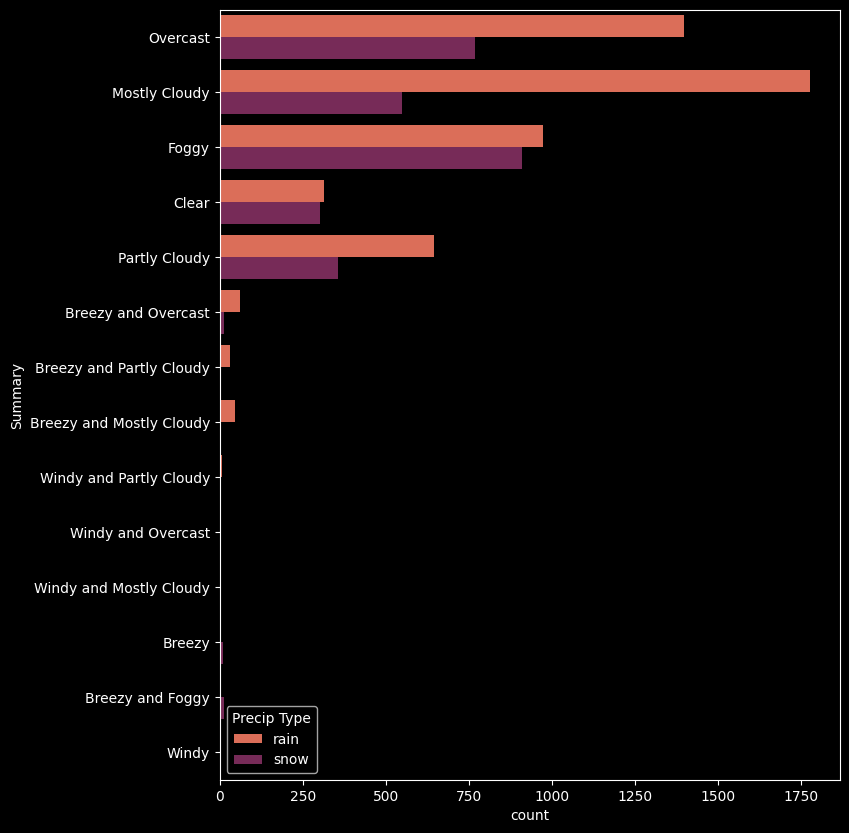

In [139]:
plt.figure(figsize=(8,10))
sns.countplot(y='Summary',data= m.get_group(12),palette="rocket_r",hue='Precip Type')

# May Data-5

In [140]:
m.get_group(5)

,Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,Dates,Times,year,month
5831,2006-05-01 00:00:00+02:00,Mostly Cloudy,rain,12.73,12.73,0.54,14.10,159,15.83,1014.48,Mostly cloudy until night.,2006-05-01,00:00:00,2006,5
5832,2006-05-01 01:00:00+02:00,Mostly Cloudy,rain,12.69,12.69,0.56,17.07,150,15.83,1014.28,Mostly cloudy until night.,2006-05-01,01:00:00,2006,5
5833,2006-05-01 02:00:00+02:00,Overcast,rain,11.13,11.13,0.91,7.50,145,6.94,1018.35,Mostly cloudy until night.,2006-05-01,02:00:00,2006,5
5834,2006-05-01 03:00:00+02:00,Mostly Cloudy,rain,11.60,11.60,0.62,17.03,139,15.87,1014.08,Mostly cloudy until night.,2006-05-01,03:00:00,2006,5
5835,2006-05-01 04:00:00+02:00,Mostly Cloudy,rain,11.09,11.09,0.71,17.11,130,15.87,1014.08,Mostly cloudy until night.,2006-05-01,04:00:00,2006,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94263,2016-05-09 19:00:00+02:00,Partly Cloudy,rain,19.97,19.97,0.40,9.47,42,16.10,1018.11,Partly cloudy throughout the day.,2016-05-09,19:00:00,2016,5
94264,2016-05-09 20:00:00+02:00,Partly Cloudy,rain,17.82,17.82,0.46,3.90,19,15.55,1018.42,Partly cloudy throughout the day.,2016-05-09,20:00:00,2016,5
94265,2016-05-09 21:00:00+02:00,Partly Cloudy,rain,13.94,13.94,0.67,8.05,70,16.10,1019.21,Partly cloudy throughout the day.,2016-05-09,21:00:00,2016,5
94266,2016-05-09 22:00:00+02:00,Partly Cloudy,rain,12.73,12.73,0.77,8.05,80,16.10,1019.70,Partly cloudy throughout the day.,2016-05-09,22:00:00,2016,5


In [141]:
m.get_group(5)['Temperature (C)'].max()

33.82

In [142]:
m.get_group(5)['Temperature (C)'].min()

1.36

**1.Maximum temperature Year wise analysis**

In [143]:
m.get_group(5).groupby(['year'],as_index=False)['Temperature (C)'].max()

,year,Temperature (C)
0,2006,30.94
1,2007,29.14
2,2008,33.82
3,2009,31.11
4,2010,27.51
5,2011,28.92
6,2012,31.11
7,2013,31.04
8,2014,28.86
9,2015,30.97


<Axes: xlabel='year', ylabel='Temperature (C)'>

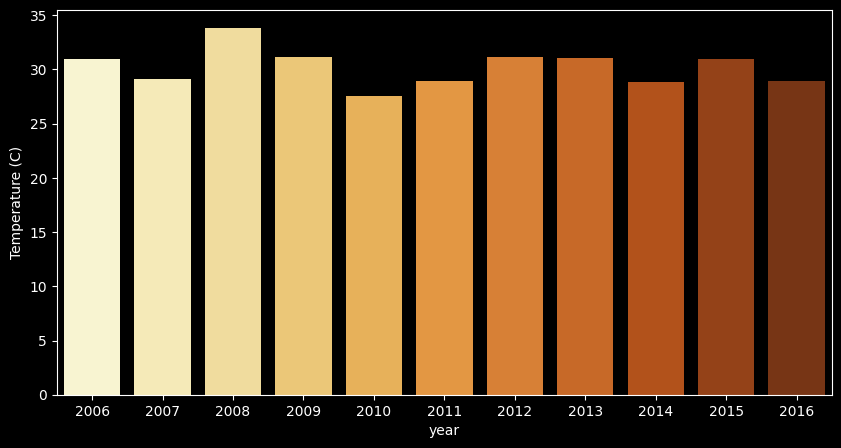

In [144]:
plt.figure(figsize=(10,5))
sns.barplot( x='year',y='Temperature (C)',data= m.get_group(5).groupby(['year'],as_index=False)['Temperature (C)'].max(),palette="YlOrBr")

**2.Minimum temperature Year wise analysis**

In [145]:
m.get_group(5).groupby(['year'],as_index=False)['Temperature (C)'].min()

,year,Temperature (C)
0,2006,4.82
1,2007,1.36
2,2008,4.01
3,2009,3.97
4,2010,7.81
5,2011,3.02
6,2012,7.31
7,2013,7.33
8,2014,3.74
9,2015,5.98


<Axes: xlabel='year', ylabel='Temperature (C)'>

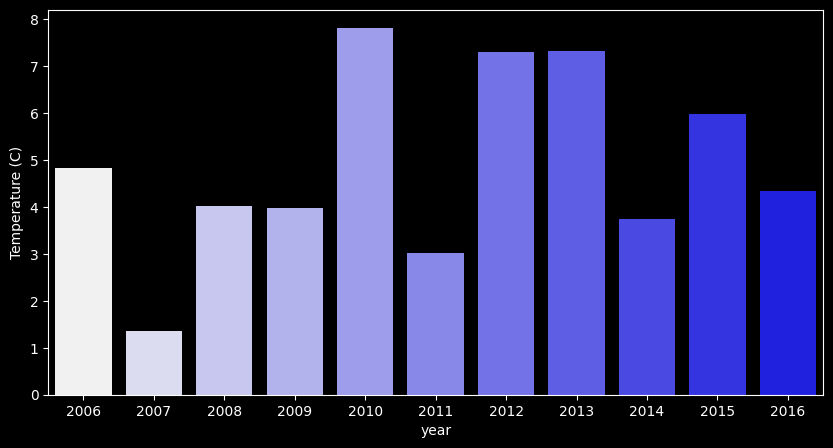

In [146]:
plt.figure(figsize=(10,5))
sns.barplot( x='year',y='Temperature (C)',data= m.get_group(5).groupby(['year'],as_index=False)['Temperature (C)'].min(),palette="light:b")

**3.Average humidity on the month of May Year wise**

In [147]:
m.get_group(5).groupby(['year'],as_index=False)['Humidity'].mean()

,year,Humidity
0,2006,0.720968
1,2007,0.652715
2,2008,0.663145
3,2009,0.596868
4,2010,0.772487
5,2011,0.687957
6,2012,0.672191
7,2013,0.734395
8,2014,0.698978
9,2015,0.702298


<Axes: xlabel='year', ylabel='Humidity'>

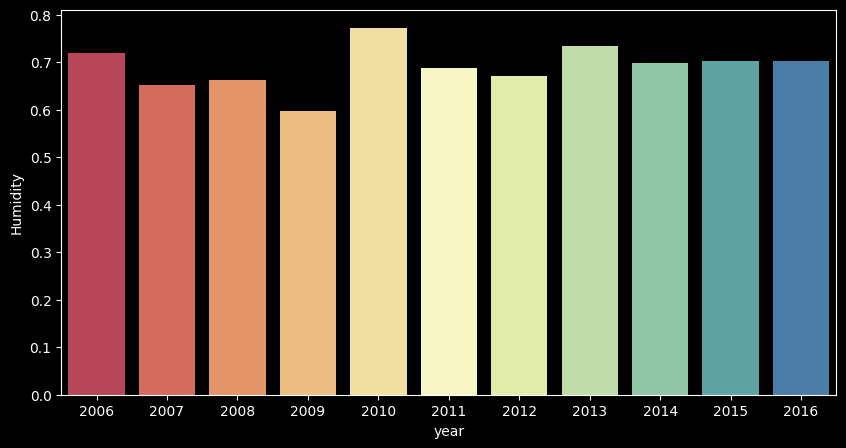

In [148]:
plt.figure(figsize=(10,5))
sns.barplot( x='year',y='Humidity',data= m.get_group(5).groupby(['year'],as_index=False)['Humidity'].mean(),palette="Spectral")

**4.Average wind speed on the month of May Year wise**

In [149]:
m.get_group(5).groupby(['year'],as_index=False)['Wind Speed (km/h)'].mean()

,year,Wind Speed (km/h)
0,2006,10.201815
1,2007,10.134825
2,2008,9.693468
3,2009,11.032917
4,2010,12.219301
5,2011,10.451062
6,2012,10.730901
7,2013,11.572648
8,2014,11.821935
9,2015,11.427944


<Axes: xlabel='year', ylabel='Wind Speed (km/h)'>

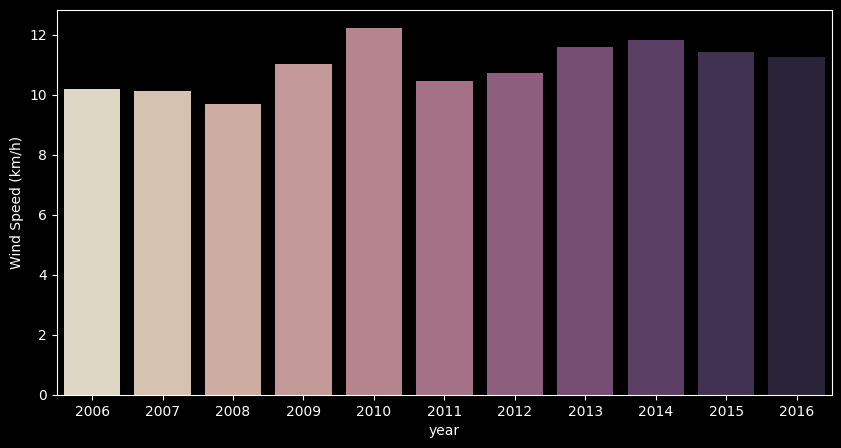

In [150]:
plt.figure(figsize=(10,5))
sns.barplot( x='year',y='Wind Speed (km/h)',data= m.get_group(5).groupby(['year'],as_index=False)['Wind Speed (km/h)'].mean(),palette="ch:s=-.2,r=.6")

**5.Average pressure on the month of May Year wise**

In [151]:
 m.get_group(5).groupby(['year'],as_index=False)['Pressure (millibars)'].mean()

,year,Pressure (millibars)
0,2006,1016.624651
1,2007,1009.050914
2,2008,1009.495605
3,2009,1014.902728
4,2010,943.473656
5,2011,1016.417890
6,2012,981.391331
7,2013,1010.995457
8,2014,1010.219368
9,2015,1013.269328


<Axes: xlabel='year', ylabel='Pressure (millibars)'>

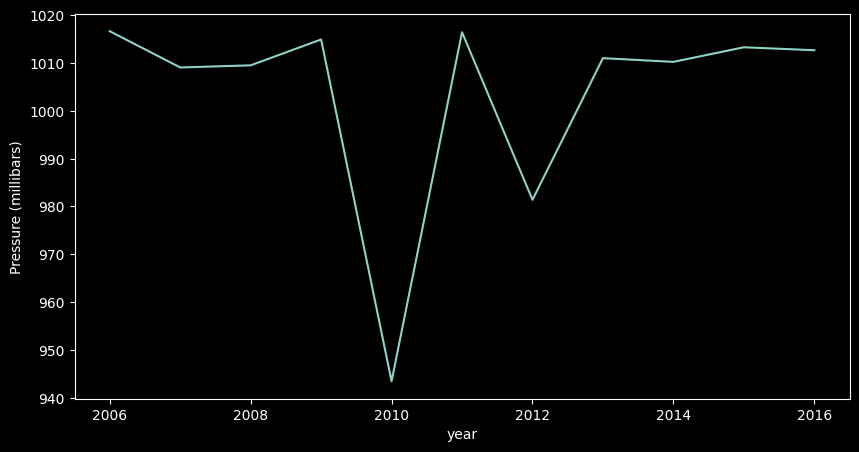

In [152]:
plt.figure(figsize=(10,5))
sns.lineplot( x='year',y='Pressure (millibars)',data= m.get_group(5).groupby(['year'],as_index=False)['Pressure (millibars)'].mean())

**6.Visibility on the month of May Year wise**

In [153]:
m.get_group(5)['Visibility (km)'].max()

16.1

In [154]:
m.get_group(5)['Visibility (km)'].min()

0.0

**7.Visibility Maximum**

In [155]:
m.get_group(5).groupby(['year'],as_index=False)['Visibility (km)'].max()

,year,Visibility (km)
0,2006,16.10
1,2007,15.87
2,2008,16.10
3,2009,16.10
4,2010,15.87
5,2011,16.10
6,2012,16.10
7,2013,15.87
8,2014,16.10
9,2015,16.10


**8.Visibility Minimum**

In [156]:
m.get_group(5).groupby(['year'],as_index=False)['Visibility (km)'].min()

,year,Visibility (km)
0,2006,1.05
1,2007,0.19
2,2008,2.53
3,2009,0.00
4,2010,0.29
5,2011,0.61
6,2012,1.45
7,2013,0.52
8,2014,0.00
9,2015,0.00


**9.Visibility Average**

In [157]:
m.get_group(5).groupby(['year'],as_index=False)['Visibility (km)'].mean()

,year,Visibility (km)
0,2006,11.748790
1,2007,11.448011
2,2008,11.452917
3,2009,11.857648
4,2010,10.777917
5,2011,11.306653
6,2012,11.843535
7,2013,11.630806
8,2014,12.640134
9,2015,12.856519


<Axes: xlabel='year', ylabel='Visibility (km)'>

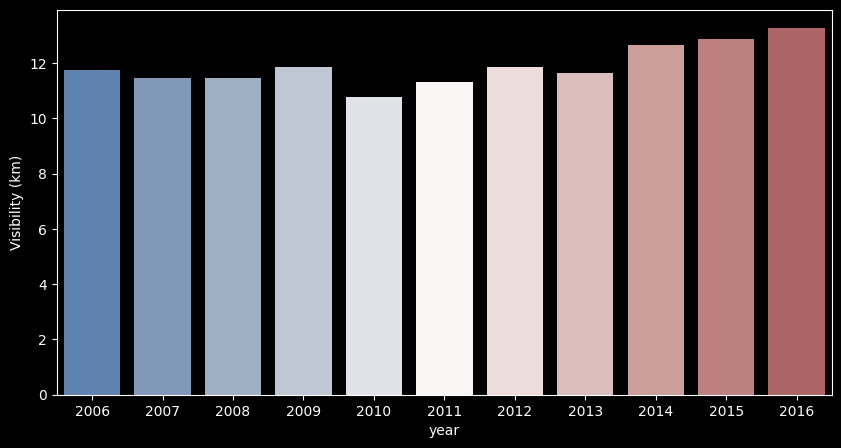

In [158]:
plt.figure(figsize=(10,5))
sns.barplot( x='year',y='Visibility (km)',data= m.get_group(5).groupby(['year'],as_index=False)['Visibility (km)'].mean(),palette="vlag")

**10.Day to day weather summary**

<Axes: xlabel='count', ylabel='Summary'>

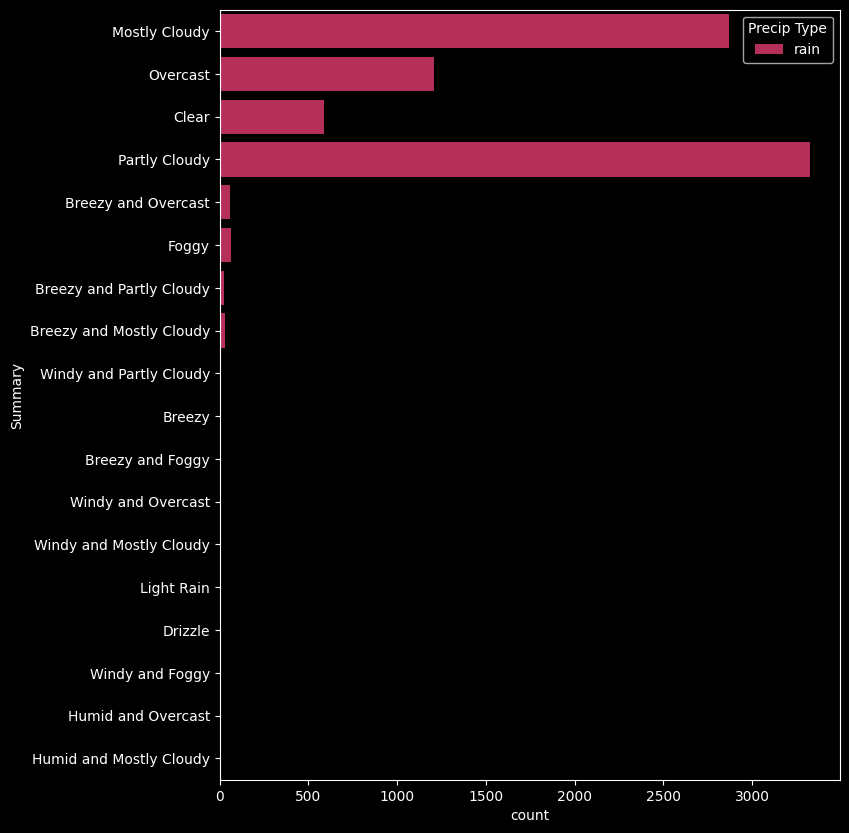

In [159]:
plt.figure(figsize=(8,10))
sns.countplot(y='Summary',data= m.get_group(5),palette="rocket_r",hue='Precip Type')

**With the analysis of the weather data we can see the change in weather or atmosphere, considering a particular month and analysing its trend over years**

**Here is the analysis of the 6 months of a year weather data**

**Data is clean**

In [160]:
df.to_csv('WeatherDataClean.csv')

**converted the clean data to csv**